### Studying yogurt fermentation dynamics using multi-task feature selection [J], Journal of Food Composition and Analysis, 2025, SCI, doi: 10.1016/jfca.2025.108160

load dataset from yogurt_tsa_A.CSV
X.shape (450, 1300)  y.shape (450,)


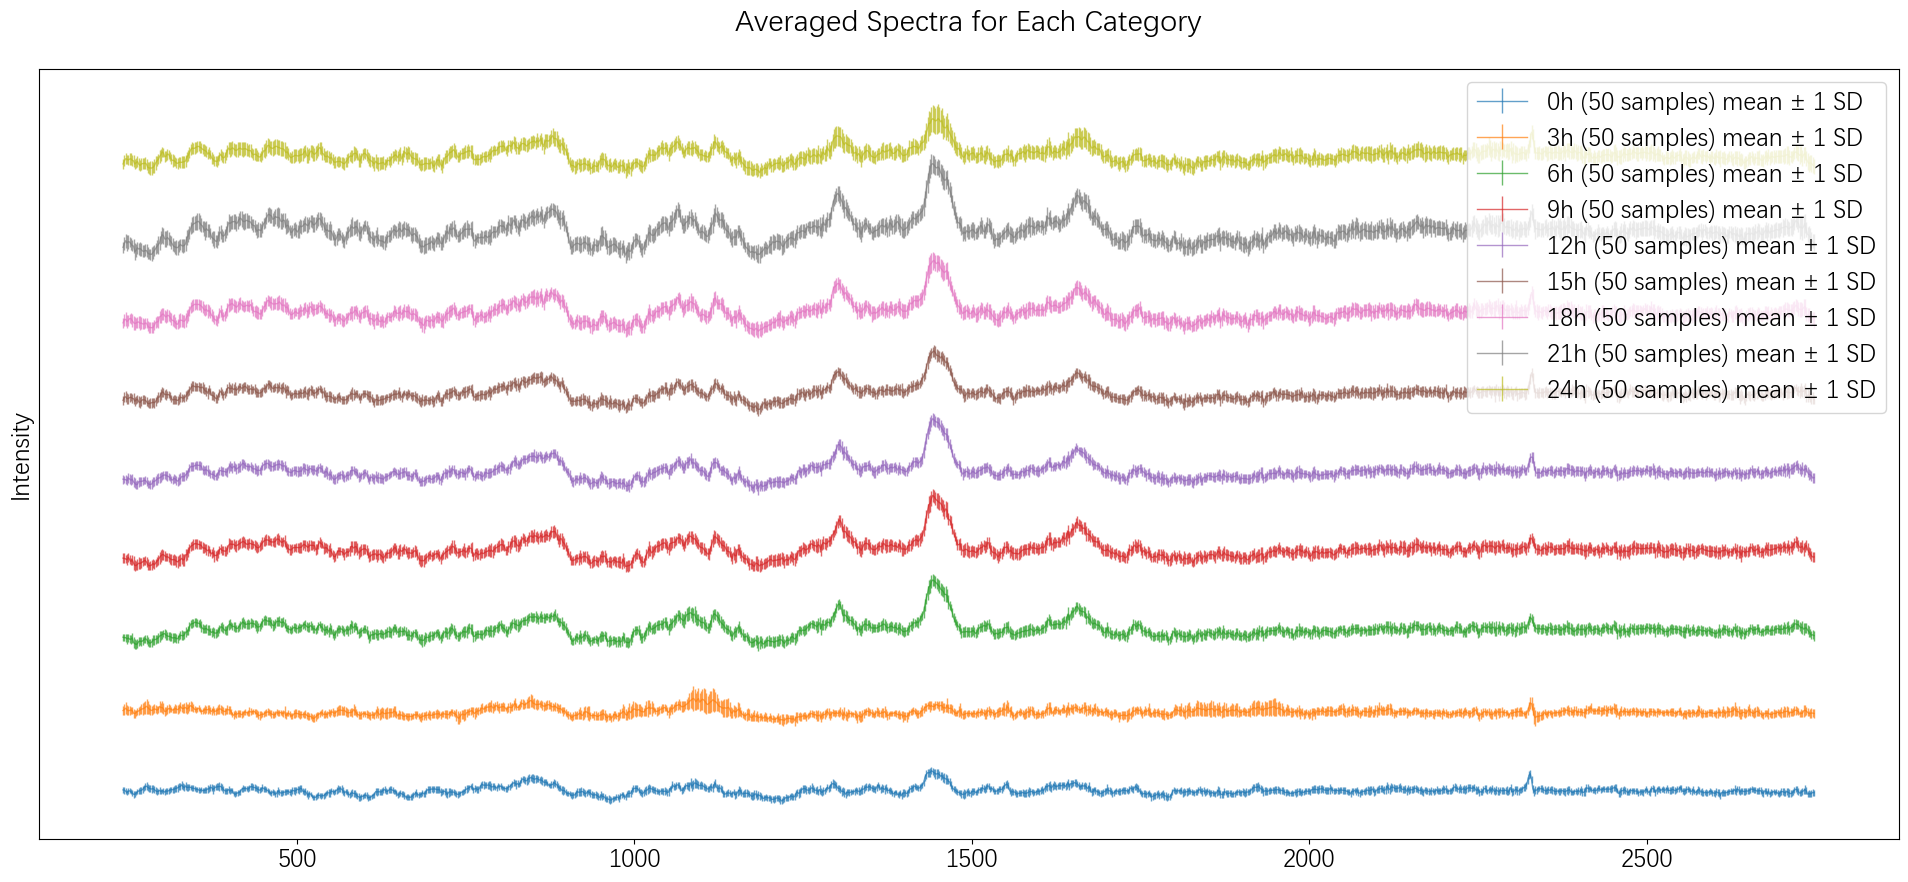

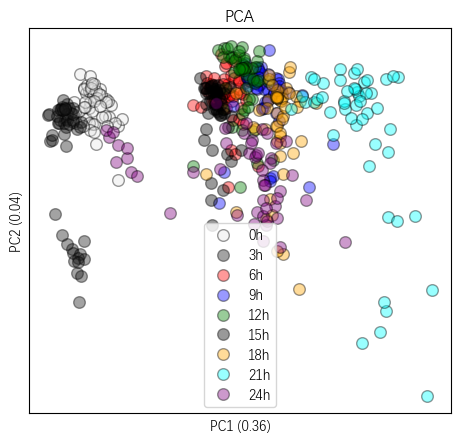

This dataset contains Raman spectra of yogurt fermentation process.

yogurt_tsa_A.CSV: use GM brand fresh cow milk
yogurt_tsa_B.CSV: use MN brand fresh goat milk

Tested each 3 hours. 每3h测一次  
Record 0-12h fermentation process. 记录发酵过程
15h~24h is refrigeration after fermentation. 15h~24h 是发酵后冷藏过程

Class labels：0-8 for 0h, 3h, 6h, ... 24h 

Each class has 60 samples. 
Instrument: Thermo Fisher DXR2 Raman spectrometer

Usage: 
[1] Either of yogurt_tsa_A or yogurt_tsa_B can be used alone for tsa (time series analysis).
[2] You can also combine yogurt_tsa_A and yogurt_tsa_B to form a multi-label/multi-task dataset. 
T1 for time and T2 for brand. 
[3] Sample code: qsi.fs.mt.ipynb

If you use this dataset, please cite: 
[1] Studying yogurt fermentation dynamics using multi-task feature selection [J], Journal of Food Composition and Analysis, 2025, SCI, doi: 10.1016/jfca.2025.108160


In [1]:
from spa import io
import numpy as np

XA, yAc, X_names, _, labels = io.load_dataset('yogurt_fermentation_a', x_range = list(range(100,1400)), shift=400)
n_classes = len(labels)

# Convert to one-hot encoding to support MT Lasso 
yAe = np.eye(n_classes)[yAc]

load dataset from yogurt_tsa_B.CSV
X.shape (450, 1300)  y.shape (450,)


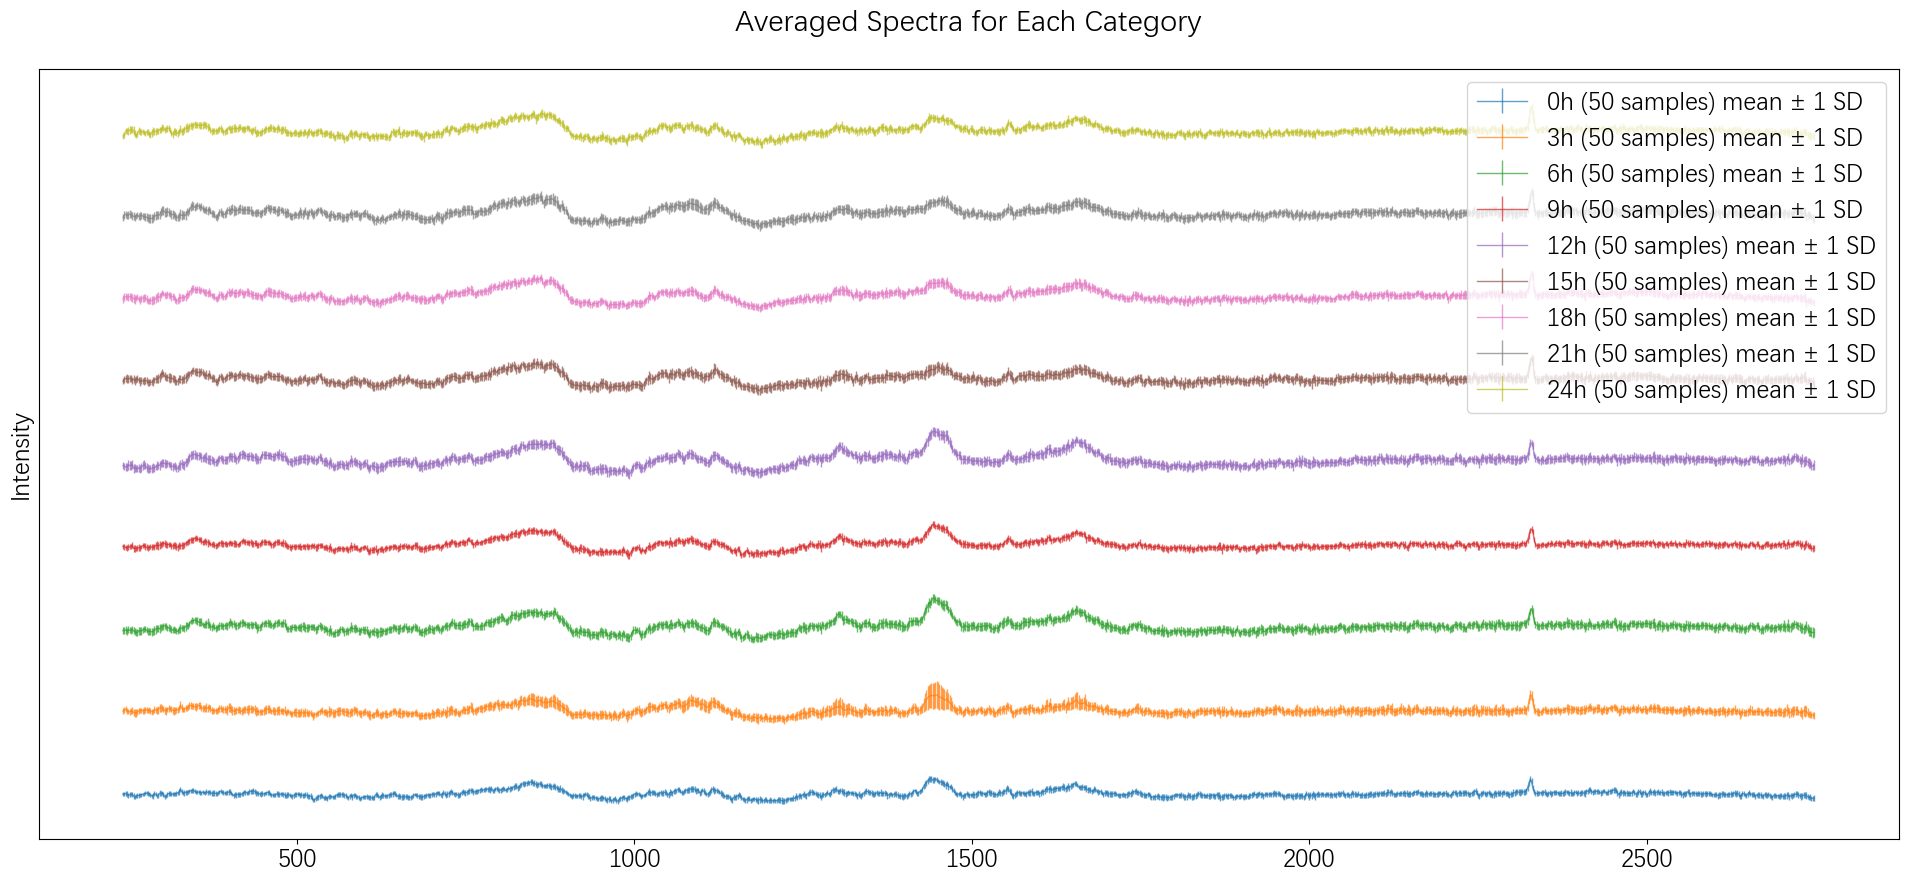

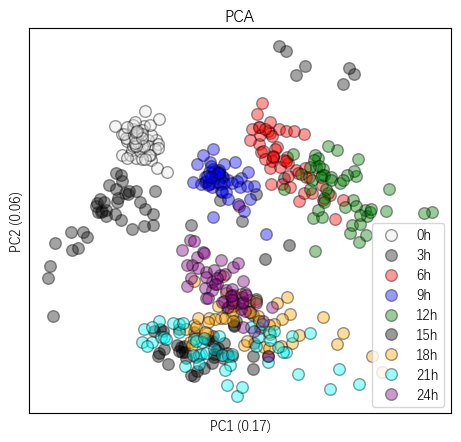

This dataset contains Raman spectra of yogurt fermentation process.

yogurt_tsa_A.CSV: use GM brand fresh cow milk
yogurt_tsa_B.CSV: use MN brand fresh goat milk

Tested each 3 hours. 每3h测一次  
Record 0-12h fermentation process. 记录发酵过程
15h~24h is refrigeration after fermentation. 15h~24h 是发酵后冷藏过程

Class labels：0-8 for 0h, 3h, 6h, ... 24h 

Each class has 60 samples. 
Instrument: Thermo Fisher DXR2 Raman spectrometer

Usage: 
[1] Either of yogurt_tsa_A or yogurt_tsa_B can be used alone for tsa (time series analysis).
[2] You can also combine yogurt_tsa_A and yogurt_tsa_B to form a multi-label/multi-task dataset. 
T1 for time and T2 for brand. 
[3] Sample code: qsi.fs.mt.ipynb

If you use this dataset, please cite: 
[1] Studying yogurt fermentation dynamics using multi-task feature selection [J], Journal of Food Composition and Analysis, 2025, SCI, doi: 10.1016/jfca.2025.108160


In [2]:
XB, yBc, X_names, _, labels = io.load_dataset('yogurt_fermentation_b', x_range = list(range(100,1400)), shift=400)
n_classes = len(labels)

# Convert to one-hot encoding to support MT Lasso 
yBe = np.eye(n_classes)[yBc]

## 三维可视化

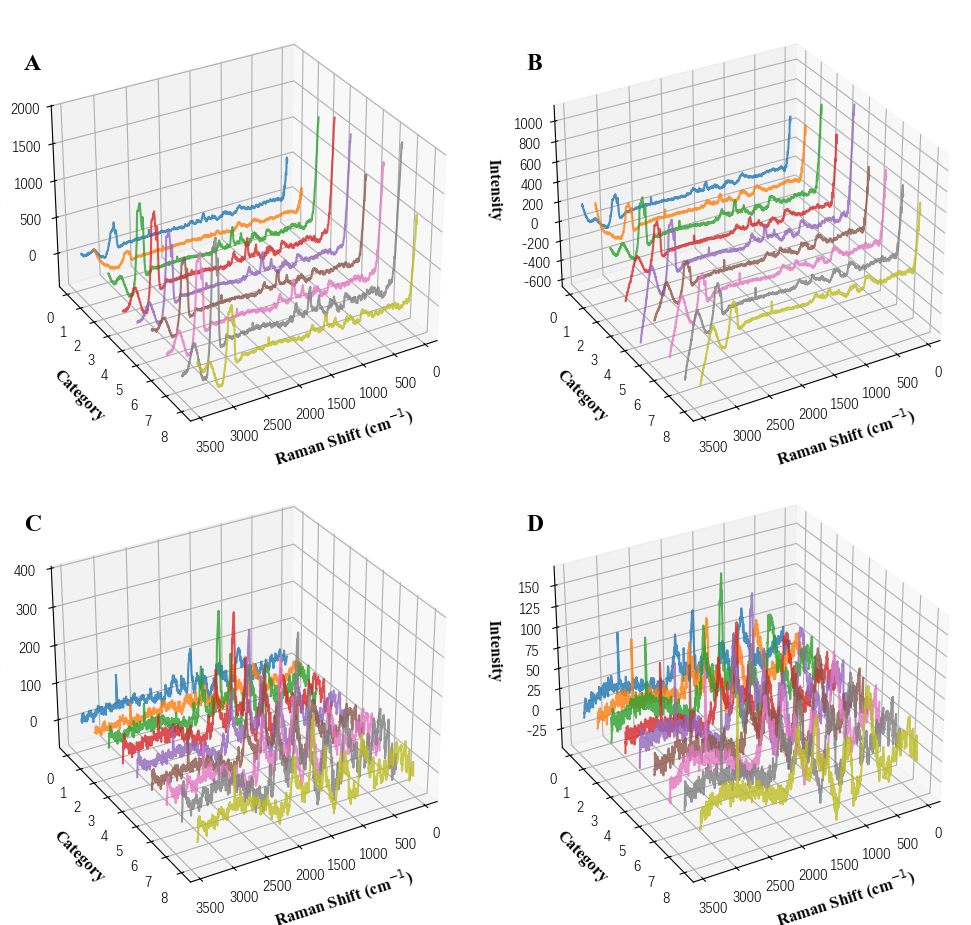

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from spa.io import id_to_fullpath

# 定义读取和绘图的函数
def plot_3d_spectra(file_path, x_range, ax, subplot_label, slice_data=False):
    data = pd.read_csv(file_path)

    # 提取标签列
    labels = data.iloc[:, 0]

    # 如果需要切片，选择特定范围的光谱数据
    if slice_data:
        spectra_data = data.iloc[:, x_range]
    else:
        spectra_data = data.iloc[:, 1:]  # 使用所有特征数据

    # 映射标签
    label_mapping = {i: i for i in range(9)}
    data['label'] = data['label'].map(label_mapping)

    # 计算每个类别的平均光谱
    grouped_data = spectra_data.groupby(data['label']).mean()

    # 生成实际的波数范围
    start_wavenumber = 49.87098
    end_wavenumber = 3399.618
    x_values = np.linspace(start_wavenumber, end_wavenumber, spectra_data.shape[1])

    # 绘制每个类别的平均光谱数据
    for label, class_i_data in grouped_data.iterrows():
        y = class_i_data.values
        z = [label] * len(x_values)
        color = cm.tab10(label)

        ax.plot(x_values, y, zs=z[0], zdir='y', color=color, alpha=0.8)

    # 设置坐标轴标签字体大小和粗细
    label_fontsize = 12
    label_fontweight = 'bold'
    tick_fontsize = 10
    tick_fontweight = 'normal'

    ax.set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=label_fontsize, fontweight=label_fontweight,fontname="Times New Roman", color='black', labelpad=8)
    ax.set_ylabel('Category', fontsize=label_fontsize, fontweight=label_fontweight,fontname="Times New Roman", color='black', labelpad=8)
    ax.set_zlabel('Intensity', fontsize=label_fontsize, fontweight=label_fontweight,fontname="Times New Roman", color='black', labelpad=8)

    # 设置坐标轴刻度字号与颜色
    ax.tick_params(axis='x', labelsize=tick_fontsize,colors='black')
    ax.tick_params(axis='y', labelsize=tick_fontsize,colors='black')
    ax.tick_params(axis='z', labelsize=tick_fontsize,colors='black')

    # 设置视角
    ax.view_init(elev=30, azim=60)
    
 # 👉 将标签放在左上角
    ax.text2D(0.01, 0.9, subplot_label, transform=ax.transAxes,
              fontsize=17, fontname="Times New Roman", fontweight='bold', ha='left', va='top')

# 设置绘图范围
x_range = list(range(100, 1400))

# 创建图形对象
fig = plt.figure(figsize=(16, 12))

# 绘制四个子图

ax1 = fig.add_subplot(221, projection='3d')
plot_3d_spectra(id_to_fullpath('yogurt_fermentation_a'), x_range, ax1, "A", slice_data=False)


ax2 = fig.add_subplot(222, projection='3d')
plot_3d_spectra(id_to_fullpath('yogurt_fermentation_b'), x_range, ax2, "B", slice_data=False)


ax3 = fig.add_subplot(223, projection='3d')
plot_3d_spectra(id_to_fullpath('yogurt_fermentation_a'), x_range, ax3, "C", slice_data=True)


ax4 = fig.add_subplot(224, projection='3d')
plot_3d_spectra(id_to_fullpath('yogurt_fermentation_b'), x_range, ax4, "D", slice_data=True)


# 手动调整子图间距，让图更紧凑
plt.subplots_adjust(left=0.35, right=0.95, top=0.95, bottom=0.2, wspace=0.1, hspace=0.05)
# 保存为高分辨率TIFF格式
fig.savefig('raman.tiff', format='tiff', dpi=600, bbox_inches='tight')

plt.show()

## 独热编码可视化

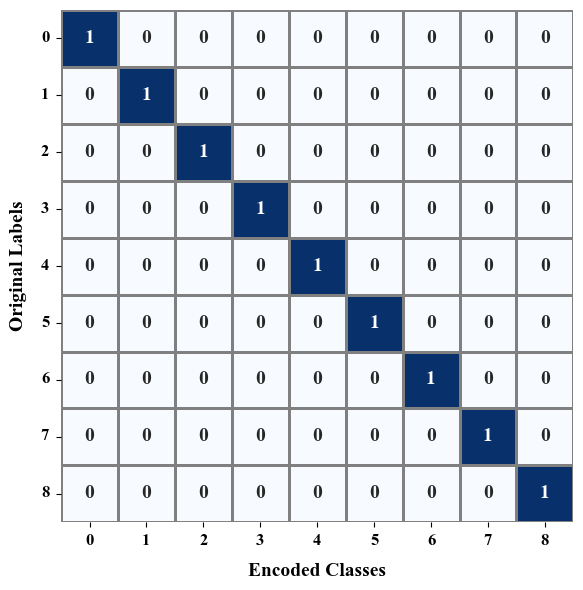

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 标签为0到8
labels = list(range(9))

# 生成独热编码
one_hot_encoding = [[1 if i == j else 0 for i in range(9)] for j in range(9)]

# 创建数据框
df = pd.DataFrame(one_hot_encoding, columns=[f"{i}" for i in labels])
df.index = [f"{i}" for i in labels]

# 显式创建图和坐标轴对象
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制热力图
sns.heatmap(
    df,
    annot=True,
    cmap="Blues",
    cbar=False,
    linewidths=0.8,
    linecolor='gray',
    annot_kws={"size": 14, "weight": "bold", "family": "Times New Roman"},
    fmt="d",
    square=True,
    xticklabels=True,
    yticklabels=True,
    ax=ax  # 明确使用 fig 中的 ax
)

# 设置标题和标签字体
ax.set_xlabel("Encoded Classes", fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
ax.set_ylabel("Original Labels", fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)

# 设置刻度标签字体
ax.tick_params(axis='x', labelsize=12, rotation=0, pad=5)
ax.tick_params(axis='y', labelsize=12, rotation=0, pad=5)

for label in ax.get_xticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')

for label in ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')

# 自动调整布局，防止标签被裁剪
plt.tight_layout()

# 保存为高分辨率TIFF格式
fig.savefig('one-hot.tiff', format='tiff', dpi=600, bbox_inches='tight')

# 显示图像
plt.show()



## MTLasso

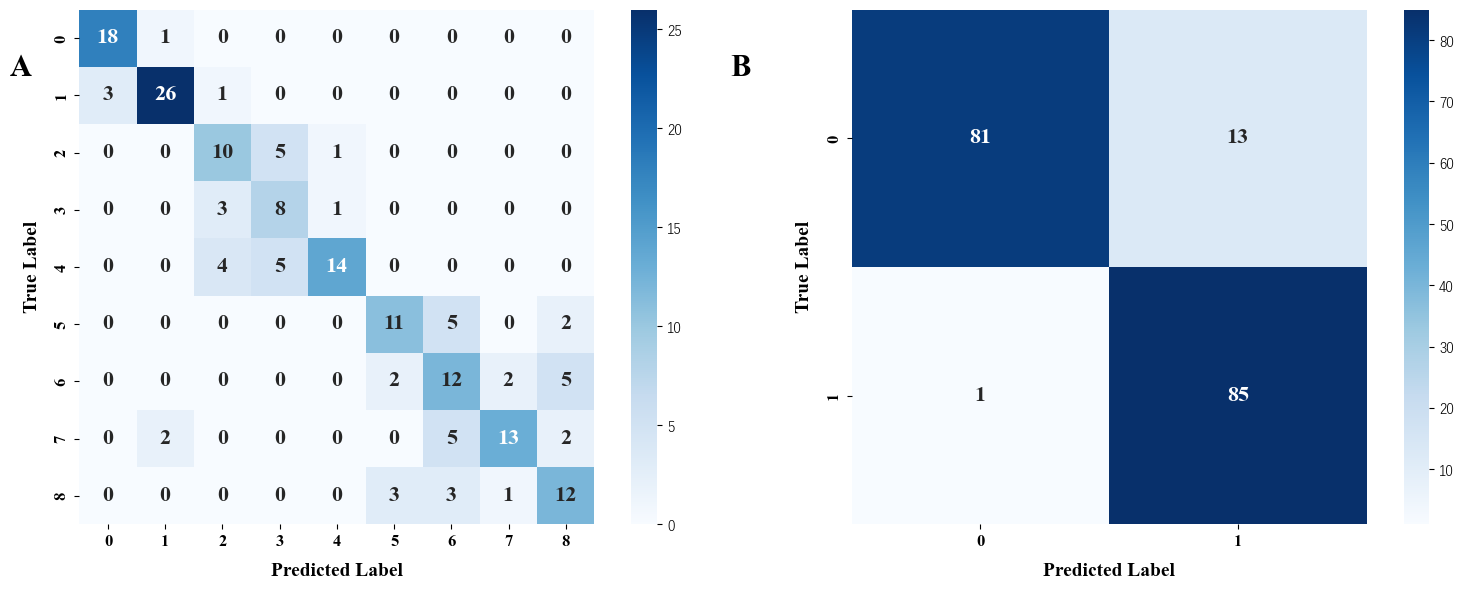

Test accuracy on T1: 0.689
Test accuracy on T2: 0.922


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLasso

# 假设 XA, XB, yAe, yBe, yAc, yBc 已定义并加载
XMT = np.vstack((XA, XB))

y_T1 = np.vstack((yAe, yBe))  # T1: time one-hot
y_T2 = np.array([0] * len(yAc) + [1] * len(yBc))  # T2: brand binary

X_train, X_test, y_T1_train, y_T1_test, y_T2_train, y_T2_test = train_test_split(
    XMT, y_T1, y_T2, test_size=0.2, random_state=42
)

model = MultiTaskLasso(alpha=0.6, max_iter=1000, tol=1e-2, selection="cyclic")
model.fit(X_train, np.column_stack((y_T1_train, y_T2_train)))
yp = model.predict(X_test)

cm_T1 = confusion_matrix(y_T1_test.argmax(axis=1), yp[:, :-1].argmax(axis=1))
acc_T1 = accuracy_score(y_T1_test.argmax(axis=1), yp[:, :-1].argmax(axis=1))

cm_T2 = confusion_matrix(y_T2_test, yp[:, -1] > 0.5)
acc_T2 = accuracy_score(y_T2_test, yp[:, -1] > 0.5)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

heatmap_kwargs = dict(
    annot=True,
    cmap="Blues",
    fmt="d",
    square=True,
    linewidths=0.002,
    linecolor='#d3d3d3',
    cbar=True,
    annot_kws={"size": 16, "weight": "bold", "family": "Times New Roman"},
)

sns.heatmap(cm_T1, ax=axes[0], **heatmap_kwargs)
axes[0].set_xlabel("Predicted Label", fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[0].set_ylabel("True Label", fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[0].tick_params(axis='both', labelsize=12)
for label in axes[0].get_xticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
for label in axes[0].get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')


sns.heatmap(cm_T2, ax=axes[1], **heatmap_kwargs)
axes[1].set_xlabel("Predicted Label", fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[1].set_ylabel("True Label", fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[1].tick_params(axis='both', labelsize=12)
for label in axes[1].get_xticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
for label in axes[1].get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')

# 调整边距，保证标签显示不被裁剪
fig.subplots_adjust(left=0.1, right=0.95, top=0.9, wspace=0.3)

# 在图外左上角添加标号
fig.text(0.05, 0.9, 'A', fontsize=22, fontweight='bold', family='Times New Roman', ha='left', va='top')
fig.text(0.5, 0.9, 'B', fontsize=22, fontweight='bold', family='Times New Roman', ha='left', va='top')

plt.tight_layout()
# 保存为高分辨率TIFF格式
fig.savefig('i mtlasso.tiff', format='tiff', dpi=600, bbox_inches='tight')

plt.show()

print("Test accuracy on T1:", round(acc_T1, 3))
print("Test accuracy on T2:", round(acc_T2, 3))




# 补充计算评价指标

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLasso
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# 假设以下变量已定义：XA, XB, yAe, yBe, yAc, yBc
# XA, XB：样本特征；yAe, yBe：时间 one-hot 标签；yAc, yBc：品牌标签（0/1）

# 合并特征与标签
XMT = np.vstack((XA, XB))
y_T1 = np.vstack((yAe, yBe))  # 多类 one-hot
y_T2 = np.array([0] * len(yAc) + [1] * len(yBc))  # 二类

# 拆分训练与测试集
X_train, X_test, y_T1_train, y_T1_test, y_T2_train, y_T2_test = train_test_split(
    XMT, y_T1, y_T2, test_size=0.2, random_state=42
)

# 构建模型并训练
model = MultiTaskLasso(alpha=0.6, max_iter=1000, tol=1e-2, selection="cyclic")
model.fit(X_train, np.column_stack((y_T1_train, y_T2_train)))
yp = model.predict(X_test)

# 任务1：时间标签（多类）
y_true_T1 = y_T1_test.argmax(axis=1)
y_pred_T1 = yp[:, :-1].argmax(axis=1)
acc_T1 = accuracy_score(y_true_T1, y_pred_T1)
precision_T1 = precision_score(y_true_T1, y_pred_T1, average='macro')
recall_T1 = recall_score(y_true_T1, y_pred_T1, average='macro')
f1_T1 = f1_score(y_true_T1, y_pred_T1, average='macro')

# 任务2：品牌标签（二类）
y_true_T2 = y_T2_test
y_pred_T2 = (yp[:, -1] > 0.5).astype(int)
acc_T2 = accuracy_score(y_true_T2, y_pred_T2)
precision_T2 = precision_score(y_true_T2, y_pred_T2)
recall_T2 = recall_score(y_true_T2, y_pred_T2)
f1_T2 = f1_score(y_true_T2, y_pred_T2)

# 输出结果
print("📊 T1 任务（时间分类）:")
print(f" - Accuracy : {round(acc_T1, 3)}")
print(f" - Precision: {round(precision_T1, 3)}")
print(f" - Recall   : {round(recall_T1, 3)}")
print(f" - F1 Score : {round(f1_T1, 3)}\n")

print("📊 T2 任务（品牌分类）:")
print(f" - Accuracy : {round(acc_T2, 3)}")
print(f" - Precision: {round(precision_T2, 3)}")
print(f" - Recall   : {round(recall_T2, 3)}")
print(f" - F1 Score : {round(f1_T2, 3)}")


📊 T1 任务（时间分类）:
 - Accuracy : 0.689
 - Precision: 0.687
 - Recall   : 0.68
 - F1 Score : 0.675

📊 T2 任务（品牌分类）:
 - Accuracy : 0.922
 - Precision: 0.867
 - Recall   : 0.988
 - F1 Score : 0.924


## 权重调节后的MTLasso

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from tqdm import tqdm

# 合并数据集AB
XMT = np.vstack((XA, XB))

dic_acc = {}
best_hparam = None
best_T1_acc = 0
best_cm = ()

# 存储T1的top-3和top-5准确率
dic_top3_acc = {}
dic_top5_acc = {}

for w in tqdm([.01, .05, .1, .25, .5, 1]):

    y_T1 = np.vstack((yAe, yBe))  # T1: time
    y_T2 = np.array([0] * len(yAc) + [1] * len(yBc)) * w  # T2: brand

    # 划分整体训练集和测试集
    X_train, X_test, y_T1_train, y_T1_test, y_T2_train, y_T2_test = train_test_split(
        XMT, y_T1, y_T2, test_size=0.2, random_state=42
    )

    # 初始化多任务Lasso模型，用多任务LassoCV找到最优的acc
    model = MultiTaskLassoCV(max_iter=1000, tol=1e-2, selection="cyclic")

    # 拟合模型
    model.fit(X_train, np.column_stack((y_T1_train, y_T2_train)))

    # 在测试集上进行预测
    yp = model.predict(X_test)

    # 计算混淆矩阵和准确率
    cm_T1 = confusion_matrix(y_T1_test.argmax(axis=1), yp[:, :-1].argmax(axis=1))
    acc_T1 = accuracy_score(y_T1_test.argmax(axis=1), yp[:, :-1].argmax(axis=1))
    top3_acc_T1 = top_k_accuracy_score(y_T1_test.argmax(axis=1), yp[:, :-1], k=3)
    top5_acc_T1 = top_k_accuracy_score(y_T1_test.argmax(axis=1), yp[:, :-1], k=5)

    cm_T2 = confusion_matrix(y_T2_test / w, yp[:, -1] / w > 0.5)  # use default 0.5 threshold
    acc_T2 = accuracy_score(y_T2_test / w, yp[:, -1] / w > 0.5)

    dic_acc[round(w, 2)] = (round(acc_T1, 3), round(acc_T2, 3))
    dic_top3_acc[round(w, 2)] = round(top3_acc_T1, 3)
    dic_top5_acc[round(w, 2)] = round(top5_acc_T1, 3)

    if best_T1_acc < acc_T1:
        best_hparam = round(w, 2)
        best_cm = (cm_T1, cm_T2)
        best_T1_acc = acc_T1

print(dic_acc)
print('Best hyperparameter:', best_hparam)

print("Best test accuracy on T1:", dic_acc[best_hparam][0])
print("Best test accuracy on T2:", dic_acc[best_hparam][1])


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:42<00:00, 37.13s/it]

{0.01: (0.694, 0.922), 0.05: (0.694, 0.922), 0.1: (0.7, 0.922), 0.25: (0.7, 0.922), 0.5: (0.694, 0.922), 1: (0.678, 0.928)}
Best hyperparameter: 0.1
Best test accuracy on T1: 0.7
Best test accuracy on T2: 0.922


# 补充计算评价指标

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

dic_precision = {}
dic_recall = {}
dic_f1 = {}

for w in tqdm([.01, .05, .1, .25, .5, 1]):

    y_T1 = np.vstack((yAe, yBe))  # T1: time
    y_T2 = np.array([0] * len(yAc) + [1] * len(yBc)) * w  # T2: brand

    X_train, X_test, y_T1_train, y_T1_test, y_T2_train, y_T2_test = train_test_split(
        XMT, y_T1, y_T2, test_size=0.2, random_state=42
    )

    model = MultiTaskLassoCV(max_iter=1000, tol=1e-2, selection="cyclic")
    model.fit(X_train, np.column_stack((y_T1_train, y_T2_train)))
    yp = model.predict(X_test)

    # 预测标签
    y_pred_T1 = yp[:, :-1].argmax(axis=1)
    y_true_T1 = y_T1_test.argmax(axis=1)

    y_pred_T2 = (yp[:, -1] / w > 0.5).astype(int)
    y_true_T2 = (y_T2_test / w).astype(int)

    # 计算准确率、top-k准确率等（保持原样）
    acc_T1 = accuracy_score(y_true_T1, y_pred_T1)
    top3_acc_T1 = top_k_accuracy_score(y_true_T1, yp[:, :-1], k=3)
    top5_acc_T1 = top_k_accuracy_score(y_true_T1, yp[:, :-1], k=5)

    acc_T2 = accuracy_score(y_true_T2, y_pred_T2)

    # 新增：计算精确率、召回率、F1分数
    # 对T1，平均方式用 'macro'，因为是多分类
    prec_T1 = precision_score(y_true_T1, y_pred_T1, average='macro', zero_division=0)
    rec_T1 = recall_score(y_true_T1, y_pred_T1, average='macro', zero_division=0)
    f1_T1 = f1_score(y_true_T1, y_pred_T1, average='macro', zero_division=0)

    # 对T2，二分类，默认average='binary'
    prec_T2 = precision_score(y_true_T2, y_pred_T2, zero_division=0)
    rec_T2 = recall_score(y_true_T2, y_pred_T2, zero_division=0)
    f1_T2 = f1_score(y_true_T2, y_pred_T2, zero_division=0)

    dic_acc[round(w, 2)] = (round(acc_T1, 3), round(acc_T2, 3))
    dic_top3_acc[round(w, 2)] = round(top3_acc_T1, 3)
    dic_top5_acc[round(w, 2)] = round(top5_acc_T1, 3)

    dic_precision[round(w, 2)] = (round(prec_T1, 3), round(prec_T2, 3))
    dic_recall[round(w, 2)] = (round(rec_T1, 3), round(rec_T2, 3))
    dic_f1[round(w, 2)] = (round(f1_T1, 3), round(f1_T2, 3))

    if best_T1_acc < acc_T1:
        best_hparam = round(w, 2)
        best_T1_acc = acc_T1

print("Accuracy (T1, T2):", dic_acc)
print("Precision (T1, T2):", dic_precision)
print("Recall (T1, T2):", dic_recall)
print("F1 score (T1, T2):", dic_f1)
print('Best hyperparameter:', best_hparam)
print("Best test accuracy on T1:", dic_acc[best_hparam][0])
print("Best test accuracy on T2:", dic_acc[best_hparam][1])
print("Best precision on T1, T2:", dic_precision[best_hparam])
print("Best recall on T1, T2:", dic_recall[best_hparam])
print("Best F1 score on T1, T2:", dic_f1[best_hparam])


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:51<00:00, 38.54s/it]

Accuracy (T1, T2): {0.01: (0.694, 0.922), 0.05: (0.694, 0.922), 0.1: (0.7, 0.922), 0.25: (0.7, 0.922), 0.5: (0.694, 0.922), 1: (0.678, 0.928)}
Precision (T1, T2): {0.01: (0.689, 0.875), 0.05: (0.691, 0.875), 0.1: (0.698, 0.875), 0.25: (0.698, 0.875), 0.5: (0.689, 0.867), 1: (0.679, 0.876)}
Recall (T1, T2): {0.01: (0.687, 0.977), 0.05: (0.687, 0.977), 0.1: (0.696, 0.977), 0.25: (0.696, 0.977), 0.5: (0.687, 0.988), 1: (0.67, 0.988)}
F1 score (T1, T2): {0.01: (0.681, 0.923), 0.05: (0.681, 0.923), 0.1: (0.688, 0.923), 0.25: (0.688, 0.923), 0.5: (0.681, 0.924), 1: (0.663, 0.929)}
Best hyperparameter: 0.1
Best test accuracy on T1: 0.7
Best test accuracy on T2: 0.922
Best precision on T1, T2: (0.698, 0.875)
Best recall on T1, T2: (0.696, 0.977)
Best F1 score on T1, T2: (0.688, 0.923)


# 混淆矩阵可视化

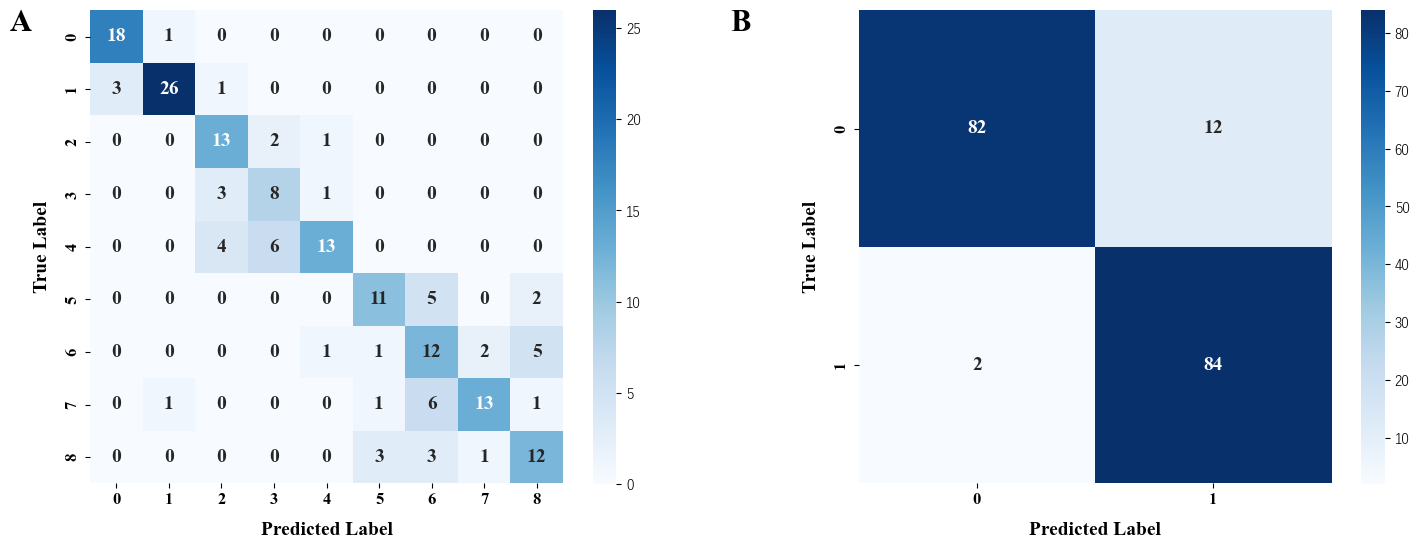

Best test accuracy on T1: 0.7
Best test accuracy on T2: 0.922


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from tqdm import tqdm


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

heatmap_kwargs = dict(
    annot=True,
    cmap='Blues',
    fmt='d',
    square=True,
    linewidths=0.002,
    linecolor='#d3d3d3',
    cbar=True,
    annot_kws={"size": 14, "weight": "bold", "family": "Times New Roman"},
)

# 绘制第一个混淆矩阵
sns.heatmap(best_cm[0], ax=axes[0], **heatmap_kwargs)
axes[0].set_xlabel('Predicted Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[0].set_ylabel('True Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[0].tick_params(axis='both', labelsize=12)
for label in axes[0].get_xticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
for label in axes[0].get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')

# 绘制第二个混淆矩阵
sns.heatmap(best_cm[1], ax=axes[1], **heatmap_kwargs)
axes[1].set_xlabel('Predicted Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[1].set_ylabel('True Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[1].tick_params(axis='both', labelsize=12)
for label in axes[1].get_xticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
for label in axes[1].get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')

# 调整边距，保证标签显示不被裁剪
fig.subplots_adjust(left=0.1, right=0.95, top=0.9, wspace=0.3)

# 在图外左上角添加标号
fig.text(0.05, 0.9, 'A', fontsize=22, fontweight='bold', family='Times New Roman', ha='left', va='top')
fig.text(0.5, 0.9, 'B', fontsize=22, fontweight='bold', family='Times New Roman', ha='left', va='top')

# 保存为高分辨率TIFF格式
fig.savefig('aw mtlasso.tiff', format='tiff', dpi=600, bbox_inches='tight')

plt.show()

print("Best test accuracy on T1:", dic_acc[best_hparam][0])
print("Best test accuracy on T2:", dic_acc[best_hparam][1])


# 权重调节示意图

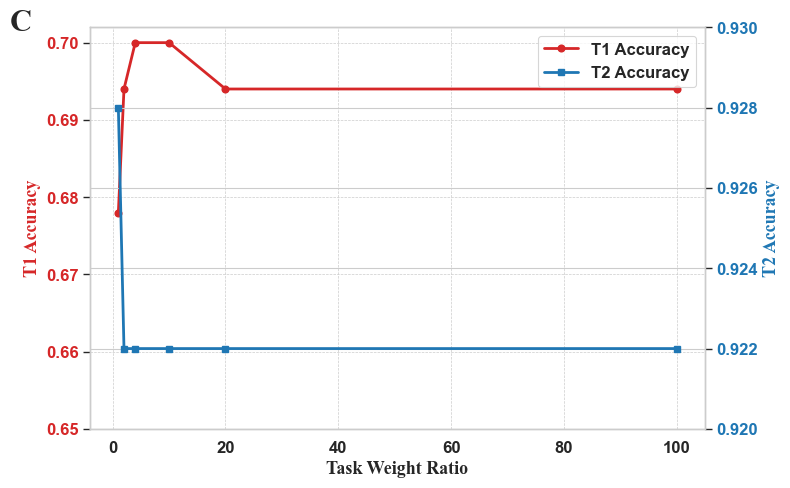

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 设置全局字体为 Times New Roman 加粗
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.weight'] = 'bold'

# 设置seaborn风格
sns.set_style("whitegrid")               
sns.set_context("paper", font_scale=1.5) 

# 示例数据（请用你的实际 dic_acc 数据替换）
ks = []
t1accs = []
t2accs = []

# 构建数据
for k, v in dic_acc.items():
    ks.append(1.0 / k)   # 横坐标是 1/k
    t1accs.append(v[0])
    t2accs.append(v[1])

# 创建主图窗口
fig, ax1 = plt.subplots(figsize=(8, 5))

# 绘制T1准确率（左轴）
color1 = 'tab:red'
ax1.set_xlabel('Task Weight Ratio', fontsize=13, fontname="Times New Roman", fontweight='bold')
ax1.set_ylabel('T1 Accuracy', color=color1, fontsize=13, fontname="Times New Roman", fontweight='bold')
ax1.plot(ks, t1accs, marker='o', color=color1, label='T1 Accuracy', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([0.65, 0.702])
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# 设置横轴字体加粗
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# 创建T2准确率的右轴
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('T2 Accuracy', color=color2, fontsize=13, fontname="Times New Roman", fontweight='bold')
ax2.plot(ks, t2accs, marker='s', color=color2, label='T2 Accuracy', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim([0.92, 0.93])
ax2.tick_params(axis='y', labelsize=12)

# 图例：合并两个轴的图例
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', frameon=True, fontsize=12)

# 添加图注 "(c)"
fig.text(0.01, 0.98, "C",ha='left', va='top', fontsize=22, fontname="Times New Roman", fontweight='bold')

             
# 自适应布局
fig.tight_layout()
# 保存为高分辨率TIFF格式
fig.savefig('w.tiff', format='tiff', dpi=600, bbox_inches='tight')
# 显示图像
plt.show()


## STLasso

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, MultiTaskLassoCV
from tqdm import tqdm

# 合并数据集AB
XMT = np.vstack((XA, XB))
y_T1 = np.vstack((yAe, yBe))  # T1: time
y_T2 = np.array([0] * len(yAc) + [1] * len(yBc))  # T2: brand

# 打印标签形状
print(y_T1.shape, y_T2.shape)

# 划分训练集和测试集
X_train, X_test, y_T1_train, y_T1_test, y_T2_train, y_T2_test = train_test_split(
    XMT, y_T1, y_T2, test_size=0.2, random_state=42)

# 初始化多任务Lasso模型
model_t1 = MultiTaskLassoCV(max_iter=1000, tol=1e-2, selection="cyclic")

with tqdm(total=100, desc="Fitting T1 Model", unit="step") as pbar:
    model_t1.fit(X_train, y_T1_train)
    pbar.update(100)

yp1 = model_t1.predict(X_test)
cm_T1 = confusion_matrix(y_T1_test.argmax(axis=1), yp1.argmax(axis=1))
acc_T1 = accuracy_score(y_T1_test.argmax(axis=1), yp1.argmax(axis=1))

# 初始化Lasso模型
model_t2 = LassoCV(max_iter=1000, tol=1e-3, selection="cyclic")

with tqdm(total=100, desc="Fitting T2 Model", unit="step") as pbar:
    model_t2.fit(X_train, y_T2_train)
    pbar.update(100)

yp2 = model_t2.predict(X_test)
cm_T2 = confusion_matrix(y_T2_test, yp2 > 0.5)
acc_T2 = accuracy_score(y_T2_test, yp2 > 0.5)

print("Test accuracy on T1:", round(acc_T1, 3))
print("Test accuracy on T2:", round(acc_T2, 3))


(900, 9) (900,)


Fitting T2 Model: 100%|████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.69step/s]

Test accuracy on T1: 0.694
Test accuracy on T2: 0.911


# 补充计算评价指标

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, MultiTaskLassoCV
from tqdm import tqdm

# 合并数据集AB
XMT = np.vstack((XA, XB))
y_T1 = np.vstack((yAe, yBe))  # T1: time
y_T2 = np.array([0] * len(yAc) + [1] * len(yBc))  # T2: brand

# 打印标签形状
print("T1 shape:", y_T1.shape)
print("T2 shape:", y_T2.shape)

# 划分训练集和测试集
X_train, X_test, y_T1_train, y_T1_test, y_T2_train, y_T2_test = train_test_split(
    XMT, y_T1, y_T2, test_size=0.2, random_state=42
)

# 初始化多任务 Lasso 模型，训练 T1
model_t1 = MultiTaskLassoCV(max_iter=1000, tol=1e-2, selection="cyclic")
with tqdm(total=100, desc="Fitting T1 Model", unit="step") as pbar:
    model_t1.fit(X_train, y_T1_train)
    pbar.update(100)

# 预测 T1
yp1 = model_t1.predict(X_test)
y_true_T1 = y_T1_test.argmax(axis=1)
y_pred_T1 = yp1.argmax(axis=1)
cm_T1 = confusion_matrix(y_true_T1, y_pred_T1)
acc_T1 = accuracy_score(y_true_T1, y_pred_T1)
prec_T1 = precision_score(y_true_T1, y_pred_T1, average='macro', zero_division=0)
rec_T1 = recall_score(y_true_T1, y_pred_T1, average='macro', zero_division=0)
f1_T1 = f1_score(y_true_T1, y_pred_T1, average='macro', zero_division=0)

# 初始化单任务 Lasso 模型，训练 T2
model_t2 = LassoCV(max_iter=1000, tol=1e-3, selection="cyclic")
with tqdm(total=100, desc="Fitting T2 Model", unit="step") as pbar:
    model_t2.fit(X_train, y_T2_train)
    pbar.update(100)

# 预测 T2
yp2 = model_t2.predict(X_test)
y_true_T2 = y_T2_test
y_pred_T2 = (yp2 > 0.5).astype(int)
cm_T2 = confusion_matrix(y_true_T2, y_pred_T2)
acc_T2 = accuracy_score(y_true_T2, y_pred_T2)
prec_T2 = precision_score(y_true_T2, y_pred_T2, zero_division=0)
rec_T2 = recall_score(y_true_T2, y_pred_T2, zero_division=0)
f1_T2 = f1_score(y_true_T2, y_pred_T2, zero_division=0)

# 输出所有评估指标
print("\n=== Task 1 (Time Classification, Multi-class) ===")
print("Test Accuracy:", round(acc_T1, 3))
print("Precision:", round(prec_T1, 3))
print("Recall:", round(rec_T1, 3))
print("F1 Score:", round(f1_T1, 3))

print("\n=== Task 2 (Brand Classification, Binary) ===")
print("Test Accuracy:", round(acc_T2, 3))
print("Precision:", round(prec_T2, 3))
print("Recall:", round(rec_T2, 3))
print("F1 Score:", round(f1_T2, 3))



T1 shape: (900, 9)
T2 shape: (900,)


Fitting T2 Model: 100%|████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.73step/s]


=== Task 1 (Time Classification, Multi-class) ===
Test Accuracy: 0.694
Precision: 0.689
Recall: 0.687
F1 Score: 0.681

=== Task 2 (Brand Classification, Binary) ===
Test Accuracy: 0.911
Precision: 0.857
Recall: 0.977
F1 Score: 0.913


# 混淆矩阵可视化

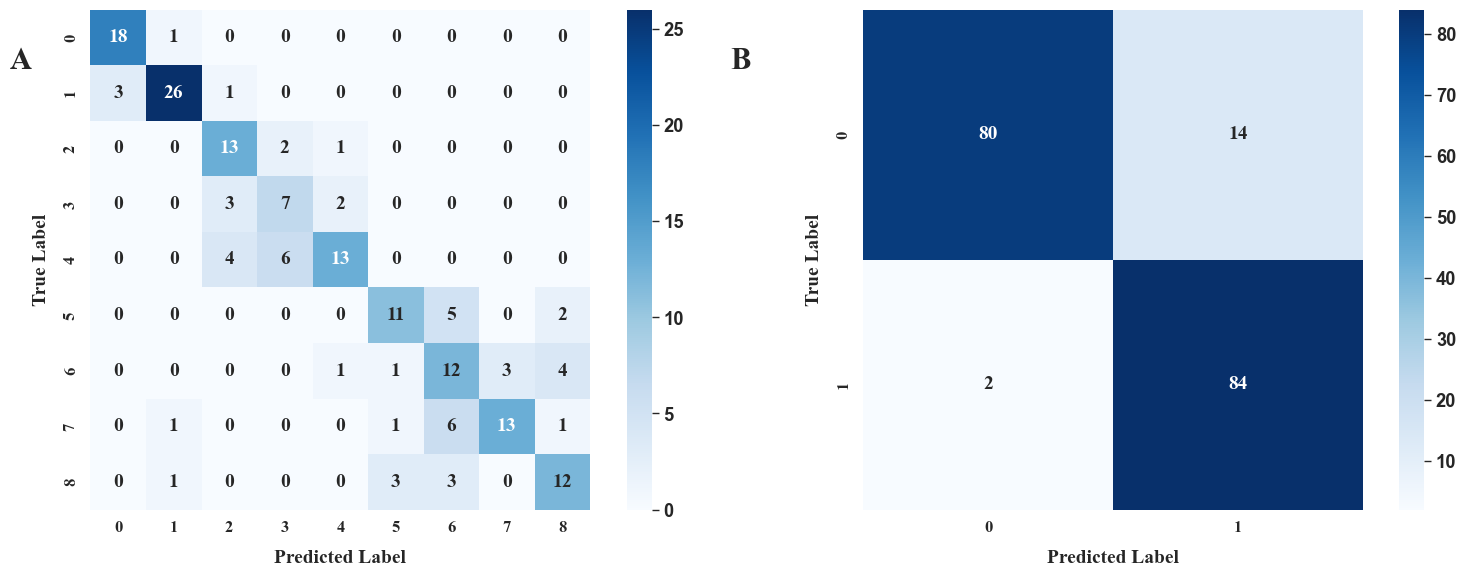

Test accuracy on T1: 0.694
Test accuracy on T2: 0.911


In [13]:
# 创建左右排列的子图并统一风格
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

heatmap_kwargs = dict(
    annot=True,
    cmap='Blues',
    fmt='d',
    square=True,
    linewidths=0.002,
    linecolor='#d3d3d3',
    cbar=True,
    annot_kws={"size": 14, "weight": "bold", "family": "Times New Roman"},
)

# T1混淆矩阵热力图
sns.heatmap(cm_T1, ax=axes[0], **heatmap_kwargs)
axes[0].set_xlabel('Predicted Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[0].set_ylabel('True Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[0].tick_params(axis='both', labelsize=12)
for label in axes[0].get_xticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
for label in axes[0].get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')

# T2混淆矩阵热力图
sns.heatmap(cm_T2, ax=axes[1], **heatmap_kwargs)
axes[1].set_xlabel('Predicted Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[1].set_ylabel('True Label', fontsize=14, fontweight='bold', family='Times New Roman', labelpad=10)
axes[1].tick_params(axis='both', labelsize=12)
for label in axes[1].get_xticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
for label in axes[1].get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')

# 调整边距，保证标签显示不被裁剪
fig.subplots_adjust(left=0.1, right=0.95, top=0.9, wspace=0.3)

# 在图外左上角添加标号
fig.text(0.05, 0.9, 'A', fontsize=22, fontweight='bold', family='Times New Roman', ha='left', va='top')
fig.text(0.5, 0.9, 'B', fontsize=22, fontweight='bold', family='Times New Roman', ha='left', va='top')
plt.tight_layout()
# 保存为高分辨率TIFF格式
fig.savefig('stlasso.tiff', format='tiff', dpi=600, bbox_inches='tight')
plt.show()

print("Test accuracy on T1:", round(acc_T1, 3))
print("Test accuracy on T2:", round(acc_T2, 3))


## 特征提取

In [14]:
import numpy as np
import pandas as pd

# 获取多任务Lasso模型的系数
coefficients = model.coef_

# 计算每个特征的重要性（绝对值的平均值）
feature_importance = np.mean(np.abs(coefficients), axis=0)

# 存储特征名称
feature_names = X_names  

# 创建一个DataFrame来存储特征名称和对应的重要性
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 按照重要性排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 打印前30个重要特征
print(feature_importance_df.head(30))

        Feature  Importance
518   1241.6630    0.000459
870   1920.4840    0.000454
474   1156.8110    0.000416
729   1648.5700    0.000407
665   1525.1480    0.000399
276    774.9745    0.000385
1084  2333.1760    0.000368
554   1311.0880    0.000355
546   1295.6610    0.000342
550   1303.3740    0.000331
1079  2323.5330    0.000330
1057  2281.1070    0.000320
1082  2329.3190    0.000319
1295  2740.0820    0.000312
609   1417.1540    0.000311
236    697.8358    0.000308
662   1519.3630    0.000308
987   2146.1150    0.000307
1293  2736.2250    0.000302
842   1866.4870    0.000300
1083  2331.2470    0.000298
1149  2458.5260    0.000293
956   2086.3320    0.000287
698   1588.7870    0.000286
523   1251.3060    0.000285
1174  2506.7380    0.000284
500   1206.9510    0.000283
739   1667.8550    0.000279
305    830.9000    0.000275
702   1596.5010    0.000273


# top30 特征重要性示意图

C:\Users\eleve\AppData\Local\Temp\ipykernel_34064\41360253.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=top30_features, palette='viridis', ax=ax)
C:\Users\eleve\AppData\Local\Temp\ipykernel_34064\41360253.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14, fontname='Times New Roman')
C:\Users\eleve\AppData\Local\Temp\ipykernel_34064\41360253.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontname='Times New Roman')


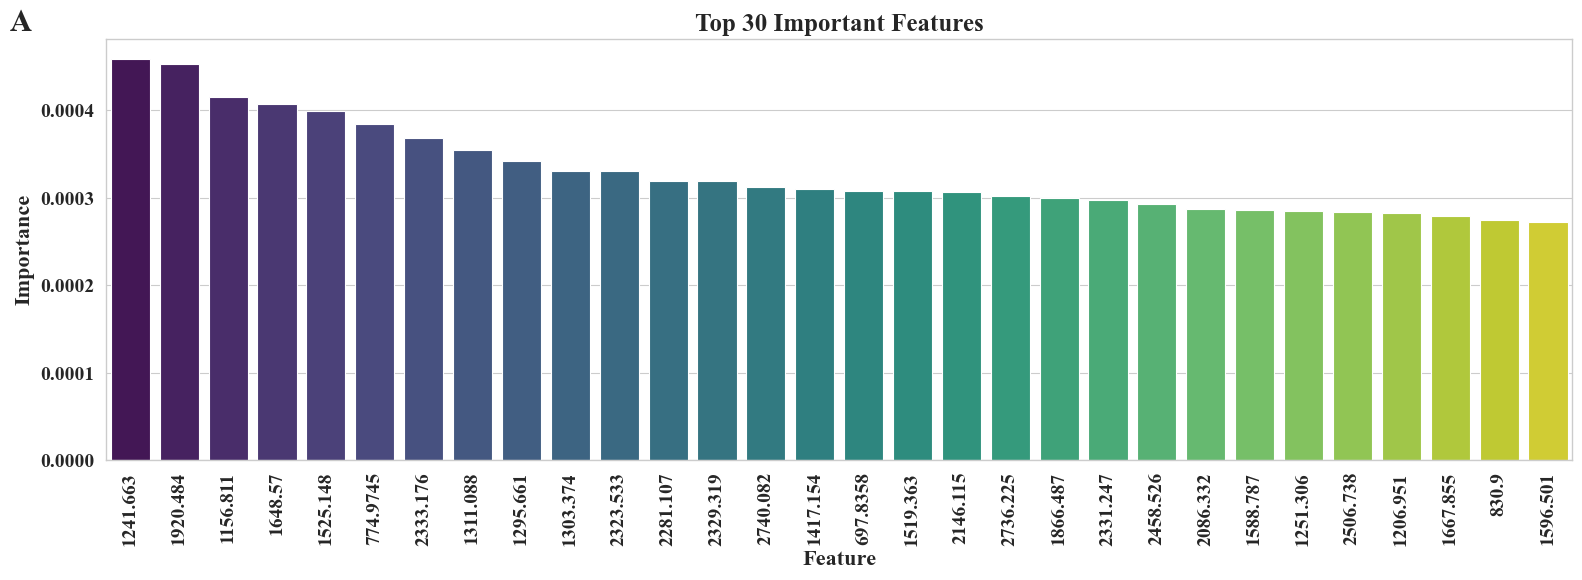

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top30_features = feature_importance_df.head(30)
top30_features = top30_features.sort_values(by='Importance', ascending=False)  # 降序排序

# 设置 Feature 为类别型，并且按重要性排序的顺序排列
top30_features['Feature'] = pd.Categorical(top30_features['Feature'], categories=top30_features['Feature'], ordered=True)

# 创建图和轴对象
fig, ax = plt.subplots(figsize=(16, 6))

# 绘制条形图
sns.barplot(x='Feature', y='Importance', data=top30_features, palette='viridis', ax=ax)

# 设置标签和标题
ax.set_xlabel('Feature', fontsize=16, fontweight='bold', family='Times New Roman')
ax.set_ylabel('Importance', fontsize=16, fontweight='bold', family='Times New Roman')
ax.set_title('Top 30 Important Features', fontsize=18, fontweight='bold', family='Times New Roman')

# 设置刻度字体
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14, fontname='Times New Roman')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontname='Times New Roman')

# 添加图外左上角标号 A（注意使用 fig.text 而不是 ax.text）
fig.text(0.01, 0.97, 'A', fontsize=22, fontweight='bold',
         family='Times New Roman', ha='left', va='top')

# 自动调整图像布局
plt.tight_layout()

# 保存为高分辨率TIFF格式
fig.savefig('top30.tiff', format='tiff', dpi=600, bbox_inches='tight')

# 显示图像
plt.show()



# 查看完整特征矩阵

In [16]:
import numpy as np
import pandas as pd

# model为训练好的 MultiTaskLasso 模型
coefficients = model.coef_

# 计算每个特征的重要性（绝对值的平均值）
feature_importance = np.mean(np.abs(coefficients), axis=0)

# 特征名列表
feature_names = X_names

# 创建 DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# 按重要性降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 打印所有特征
print(feature_importance_df)

# 保存成文件
feature_importance_df.to_csv('feature_importance_all.csv', index=False)

       Feature  Importance
518  1241.6630    0.000459
870  1920.4840    0.000454
474  1156.8110    0.000416
729  1648.5700    0.000407
665  1525.1480    0.000399
..         ...         ...
591  1382.4420    0.000000
590  1380.5130    0.000000
589  1378.5850    0.000000
582  1365.0850    0.000000
2     246.5746    0.000000

[1300 rows x 2 columns]


C:\Users\eleve\AppData\Local\Temp\ipykernel_34064\4181931798.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=nonzero_feature_df, palette='viridis')


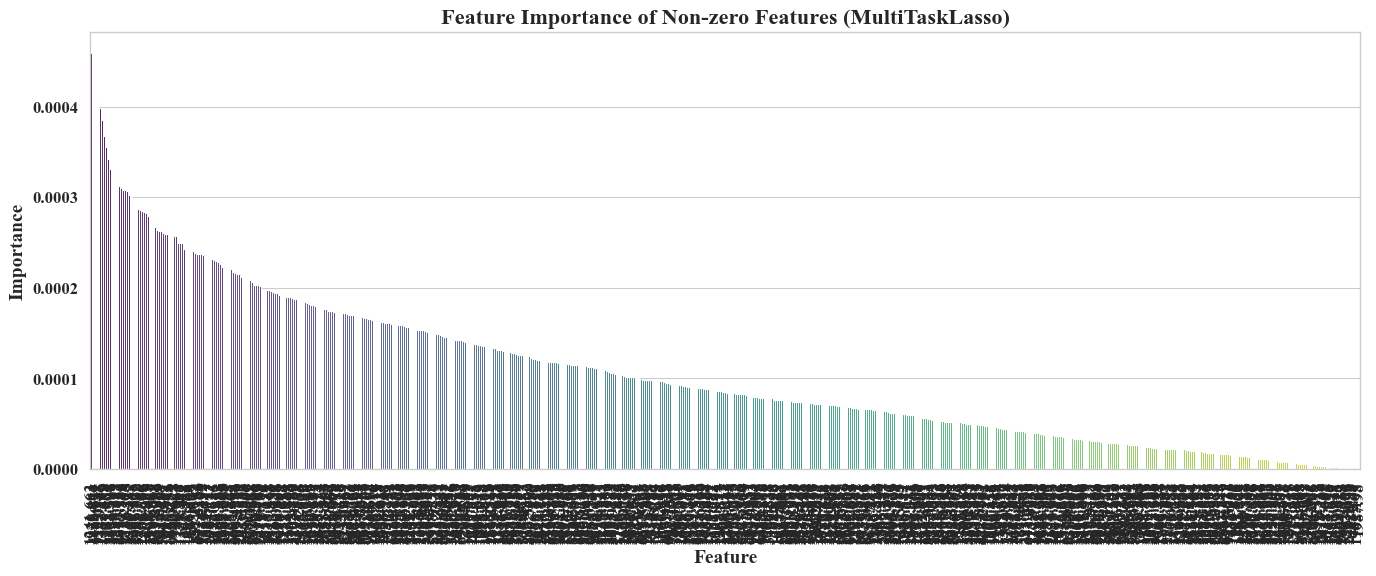

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: 提取模型系数 ---
# model: 训练好的 MultiTaskLasso 模型
coef_matrix = model.coef_  

# --- Step 2: 找出任一任务中非零的特征 ---
nonzero_mask = np.any(coef_matrix != 0, axis=0)  # 返回布尔数组，标记非零特征
nonzero_indices = np.where(nonzero_mask)[0]     # 非零特征索引

# --- Step 3: 提取非零特征名和重要性 ---
nonzero_features = np.array(X_names)[nonzero_indices]  # 非零特征名

# 计算非零特征在各任务上的平均绝对系数作为重要性指标
feature_importance = np.mean(np.abs(coef_matrix[:, nonzero_indices]), axis=0)

# 构建DataFrame保存非零特征和重要性
nonzero_feature_df = pd.DataFrame({
    'Feature': nonzero_features,
    'Importance': feature_importance
})

# 按重要性降序排序
nonzero_feature_df = nonzero_feature_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# 保存为CSV文件，方便查阅
nonzero_feature_df.to_csv('nonzero_features_importance.csv', index=False)

# --- Step 4: 可视化非零特征的重要性 ---
# 设置类别顺序，防止绘图时打乱顺序
nonzero_feature_df['Feature'] = pd.Categorical(
    nonzero_feature_df['Feature'],
    categories=nonzero_feature_df['Feature'],
    ordered=True
)

plt.figure(figsize=(14, 6))
sns.barplot(x='Feature', y='Importance', data=nonzero_feature_df, palette='viridis')

plt.xticks(rotation=90, fontsize=12, fontweight='bold', family='Times New Roman')
plt.yticks(fontsize=12, fontweight='bold', family='Times New Roman')
plt.xlabel('Feature', fontsize=14, fontweight='bold', family='Times New Roman')
plt.ylabel('Importance', fontsize=14, fontweight='bold', family='Times New Roman')
plt.title('Feature Importance of Non-zero Features (MultiTaskLasso)', fontsize=16, fontweight='bold', family='Times New Roman')

plt.tight_layout()
plt.savefig('nonzero_feature_importance.tiff', format='tiff', dpi=600)
plt.show()

# 多任务特征选择有效性可视化（venn图）

In [18]:
import numpy as np
import pandas as pd

# 1. 提取T1（多任务Lasso）模型系数
# model_t1.coef_ 的形状是 (任务数, 特征数)，先取绝对值平均作为重要性
coef_t1 = model_t1.coef_
importance_t1 = np.mean(np.abs(coef_t1), axis=0)

# 生成DataFrame，排序并提取Top 50
feature_importance_t1 = pd.DataFrame({
    'Feature': X_names,
    'Importance': importance_t1
}).sort_values(by='Importance', ascending=False)

top50_t1 = feature_importance_t1.head(50)

# 2. 提取T2（单任务Lasso）模型系数
coef_t2 = model_t2.coef_
importance_t2 = np.abs(coef_t2)  # 单任务，直接绝对值

feature_importance_t2 = pd.DataFrame({
    'Feature': X_names,
    'Importance': importance_t2
}).sort_values(by='Importance', ascending=False)

top50_t2 = feature_importance_t2.head(50)

# 输出查看
print("Top 50 features for Task 1 (MultiTaskLasso):")
print(top50_t1)

print("\nTop 50 features for Task 2 (Lasso):")
print(top50_t2)


Top 50 features for Task 1 (MultiTaskLasso):
        Feature  Importance
518   1241.6630    0.000485
276    774.9745    0.000432
870   1920.4840    0.000417
665   1525.1480    0.000415
1084  2333.1760    0.000389
554   1311.0880    0.000373
1082  2329.3190    0.000362
546   1295.6610    0.000345
1174  2506.7380    0.000340
609   1417.1540    0.000339
729   1648.5700    0.000334
1057  2281.1070    0.000329
1293  2736.2250    0.000326
1079  2323.5330    0.000323
1295  2740.0820    0.000322
842   1866.4870    0.000318
500   1206.9510    0.000317
1083  2331.2470    0.000316
136    504.9891    0.000313
523   1251.3060    0.000312
1149  2458.5260    0.000311
815   1814.4180    0.000296
792   1770.0630    0.000295
1275  2701.5130    0.000292
577   1355.4430    0.000288
474   1156.8110    0.000278
956   2086.3320    0.000277
1012  2194.3260    0.000276
438   1087.3860    0.000274
739   1667.8550    0.000273
316    852.1132    0.000272
987   2146.1150    0.000268
593   1386.2980    0.000263
236

In [19]:
!pip install matplotlib-venn


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=683a56a9792a888e00e75a20a1c907855352c4d3e2a6db5c34d38b567958deee
  Stored in directory: c:\users\eleve\appdata\local\pip\cache\wheels\dc\66\8d\1e9c4d5f5a8f4f6b0a60ae2c440bb7dddec06579bfd27d1fa8
Successfully built matplotlib-venn



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


MTLasso Top30与STLasso Task1 Top50的交集数量： 26
MTLasso Top30与STLasso Task2 Top50的交集数量： 7
STLasso Task1 Top50与STLasso Task2 Top50的交集数量： 5


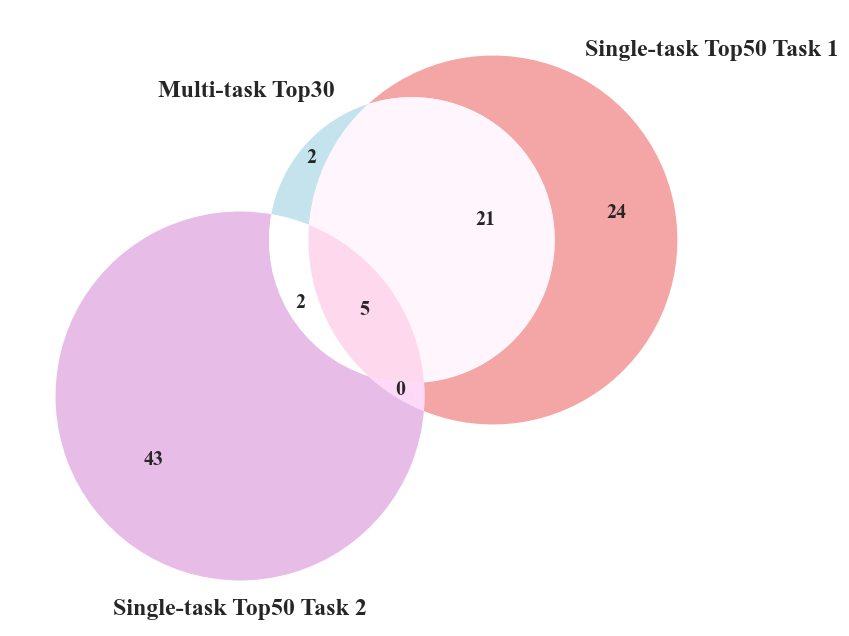

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib

# 设置全局字体为 Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# 1. 取多任务整体Top30特征名集合
top30_multi_all = set(feature_importance_df.head(30)['Feature'])

# 2. 取单任务Task1 Top50特征名集合
top50_single_t1 = set(top50_t1['Feature'])

# 3. 取单任务Task2 Top50特征名集合
top50_single_t2 = set(top50_t2['Feature'])

# 打印交集数量和具体内容辅助检查
print("MTLasso Top30与STLasso Task1 Top50的交集数量：", len(top30_multi_all & top50_single_t1))
print("MTLasso Top30与STLasso Task2 Top50的交集数量：", len(top30_multi_all & top50_single_t2))
print("STLasso Task1 Top50与STLasso Task2 Top50的交集数量：", len(top50_single_t1 & top50_single_t2))

# 绘制三集合韦恩图
plt.figure(figsize=(10, 8))
venn3([top30_multi_all, top50_single_t1, top50_single_t2], 
      set_labels=('Multi-task Top30 ', 'Single-task Top50 Task 1', 'Single-task Top50 Task 2'),
      set_colors=('lightblue', 'lightcoral', 'plum'),
      alpha=0.7)

plt.title('', fontsize=14, fontweight='bold')
plt.show()


# 特征在光谱位置上的示意图

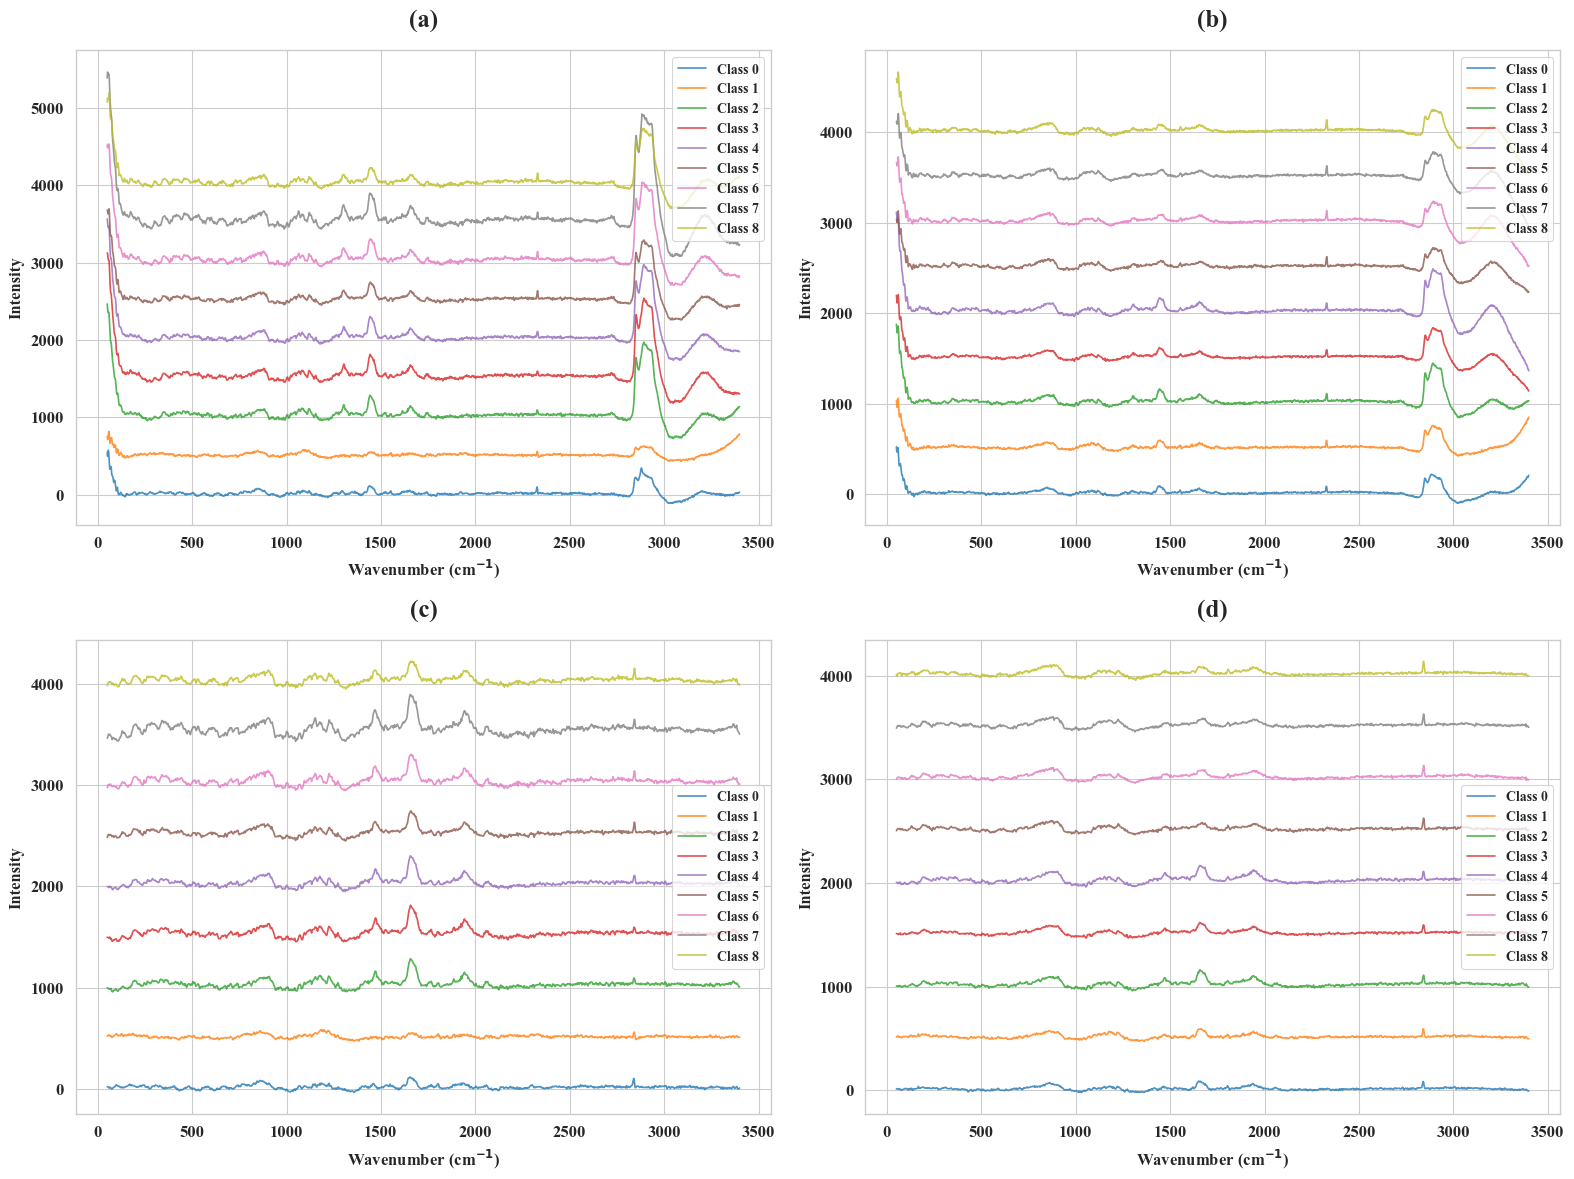

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 定义读取和绘图的函数（二维图）
def plot_2d_spectra(file_path, x_range, ax, subplot_label, slice_data=False, offset=500):
    data = pd.read_csv(file_path)

    # 提取标签列
    labels = data.iloc[:, 0]

    # 选择光谱数据
    spectra_data = data.iloc[:, x_range] if slice_data else data.iloc[:, 1:]

    # 生成波数范围
    start_wavenumber = 49.87098
    end_wavenumber = 3399.618
    x_values = np.linspace(start_wavenumber, end_wavenumber, spectra_data.shape[1])

    # 计算每个类别的平均光谱
    grouped_data = spectra_data.groupby(labels).mean()

    for label, class_i_data in grouped_data.iterrows():
        y = class_i_data.values + label * offset  # 添加偏移量防止重叠
        color = cm.tab10(int(label))  # 映射颜色
        ax.plot(x_values, y, color=color, label=f'Class {int(label)}', alpha=0.8)

    # 坐标轴和标签设置
    ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Intensity', fontsize=12, fontweight='bold')
    ax.tick_params(labelsize=12)
    
    # 添加子图标记
    ax.text(0.5, 1.05, subplot_label, transform=ax.transAxes,
            fontsize=18, fontname="Times New Roman", ha='center')
    
    ax.legend(fontsize=10)

# 设置绘图范围
x_range = list(range(100, 1400))

# 创建图形对象
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 绘制四个子图
plot_2d_spectra(id_to_fullpath('yogurt_fermentation_a'), x_range, axs[0, 0], "(a)", slice_data=False)
plot_2d_spectra(id_to_fullpath('yogurt_fermentation_b'), x_range, axs[0, 1], "(b)", slice_data=False)
plot_2d_spectra(id_to_fullpath('yogurt_fermentation_a'), x_range, axs[1, 0], "(c)", slice_data=True)
plot_2d_spectra(id_to_fullpath('yogurt_fermentation_b'), x_range, axs[1, 1], "(d)", slice_data=True)

plt.tight_layout()
plt.show()


C:\Users\eleve\AppData\Local\Temp\ipykernel_34064\2586464581.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


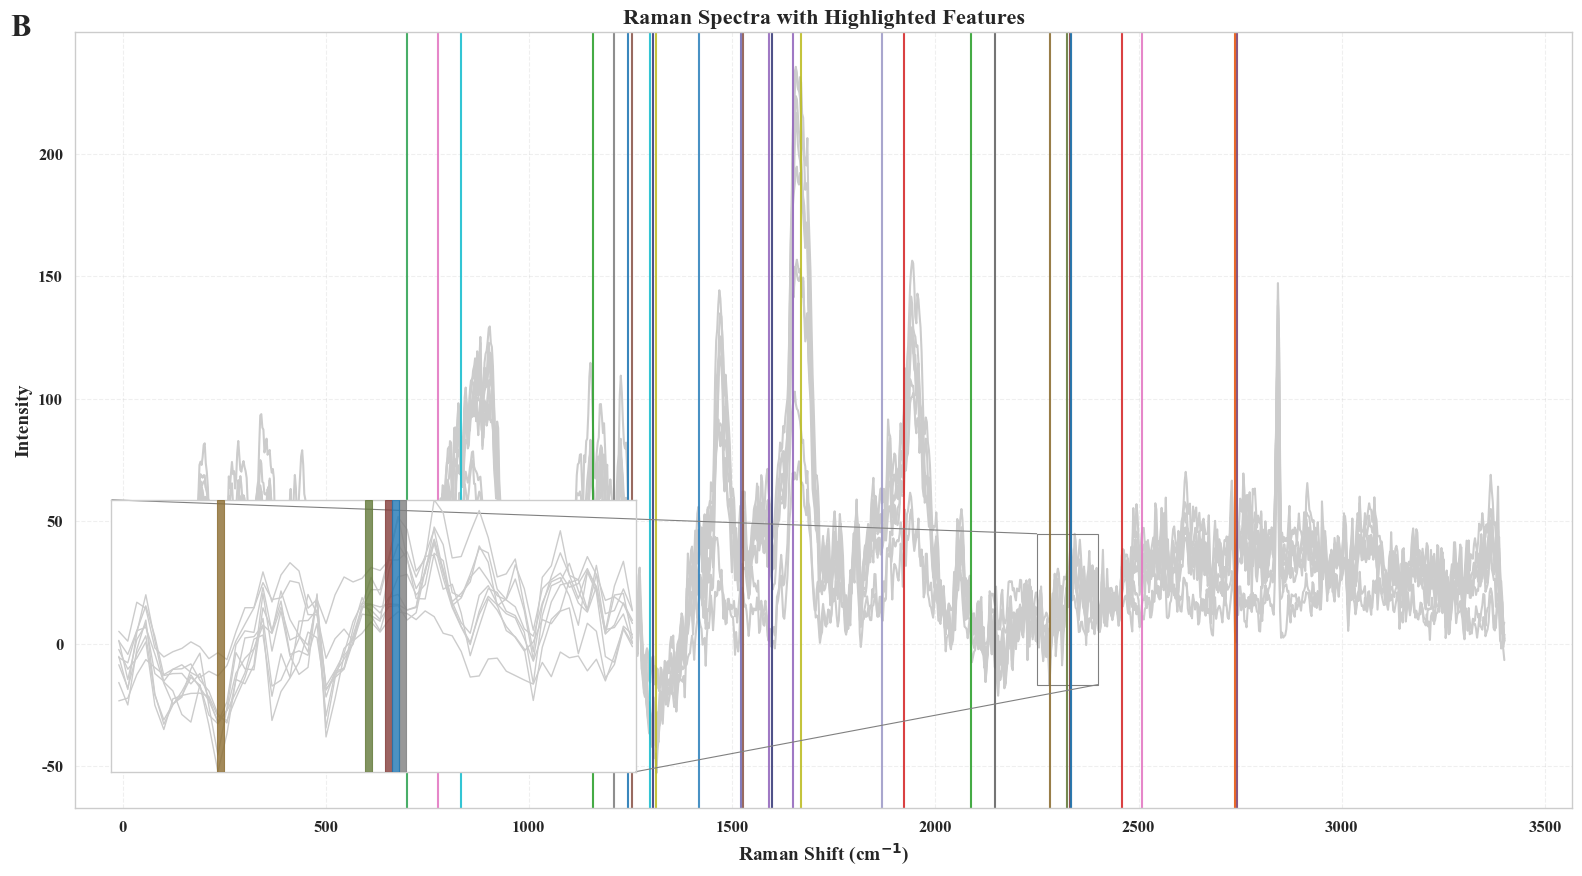

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# 高亮峰值列表
highlight_peaks = [
    1241.6630, 1920.4840, 1156.8110, 1648.5700, 1525.1480, 774.9745, 2333.1760, 1311.0880, 
    1295.6610, 1303.3740, 2323.5330, 2281.1070, 2329.3190, 2740.0820, 1417.1540, 697.8358, 
    1519.3630, 2146.1150, 2736.2250, 1866.4870, 2331.2470, 2458.5260, 2086.3320, 1588.7870, 
    1251.3060, 2506.7380, 1206.9510, 1667.8550, 830.9000, 1596.5010
]

# 高对比深色系颜色（20种循环使用）
highlight_colors = [
    "#1f77b4", "#d62728", "#2ca02c", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#393b79",
    "#637939", "#8c6d31", "#843c39", "#7b4173", "#3182bd",
    "#31a354", "#756bb1", "#636363", "#e6550d", "#9e9ac8"
]

# 读取数据
file_A = id_to_fullpath('yogurt_fermentation_a')
file_B = id_to_fullpath('yogurt_fermentation_b')
data_a = pd.read_csv(file_A)
data_b = pd.read_csv(file_B)

labels_a = data_a.iloc[:, 0]
labels_b = data_b.iloc[:, 0]
x_range = list(range(100, 1400))
spectra_a = data_a.iloc[:, x_range]
spectra_b = data_b.iloc[:, x_range]

spectra_combined = pd.concat([spectra_a, spectra_b], axis=0)
labels_combined = pd.concat([labels_a, labels_b], axis=0)

# 生成波数坐标
start_wavenumber = 49.87098
end_wavenumber = 3399.618
x_values = np.linspace(start_wavenumber, end_wavenumber, spectra_a.shape[1])

# 平均每个类别的光谱
spectra_combined = spectra_combined.reset_index(drop=True)
labels_combined = labels_combined.reset_index(drop=True)
spectra_combined['label'] = labels_combined
grouped = spectra_combined.groupby('label').mean().drop(columns='label', errors='ignore')

# 创建图形
fig, ax = plt.subplots(figsize=(16, 9))

# 背景颜色和曲线颜色设置为浅灰
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
base_color = "#cccccc"

# 绘制平均曲线
for label, row in grouped.iterrows():
    ax.plot(x_values, row.values, color=base_color, linewidth=1.5, zorder=1)

# 绘制高亮峰值区域
for i, peak in enumerate(highlight_peaks):
    color = highlight_colors[i % len(highlight_colors)]
    ax.axvspan(peak - 1.2, peak + 1.2, color=color, alpha=0.8, zorder=2)

# 图形设置
ax.set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=14, fontweight='bold')
ax.set_ylabel('Intensity', fontsize=14, fontweight='bold')
ax.set_title("Raman Spectra with Highlighted Features", fontsize=16, fontweight='bold')
ax.tick_params(labelsize=12)
ax.grid(True, linestyle='--', alpha=0.3)

# 添加放大框
zoom_range = (2250, 2400)
axins = inset_axes(ax, width="35%", height="35%", loc='lower left', borderpad=2)

# 放大区域索引
zoom_indices = np.where((x_values >= zoom_range[0]) & (x_values <= zoom_range[1]))[0]
x_zoom = x_values[zoom_indices]

# 放大框中绘制浅灰曲线
for label, row in grouped.iterrows():
    y = row.values[zoom_indices]
    axins.plot(x_zoom, y, color=base_color, linewidth=1)

# 放大框中绘制高亮区域
for i, peak in enumerate(highlight_peaks):
    if zoom_range[0] <= peak <= zoom_range[1]:
        color = highlight_colors[i % len(highlight_colors)]
        axins.axvspan(peak - 1, peak + 1, color=color, alpha=0.8, zorder=3)

# 设置放大框样式
axins.set_xlim(zoom_range)
axins.set_ylim(grouped.values[:, zoom_indices].min(), grouped.values[:, zoom_indices].max())
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# 添加图外左上角标号 A（注意使用 fig.text 而不是 ax.text）
fig.text(0.01, 0.97, 'B', fontsize=22, fontweight='bold',
         family='Times New Roman', ha='left', va='top')

# 自动调整图像布局
plt.tight_layout()

# 保存为高分辨率TIFF格式
fig.savefig('highlight.tiff', format='tiff', dpi=600, bbox_inches='tight')




## Top 30 Raman Spectral Features Temporal Variation Differences between Two Milk Types

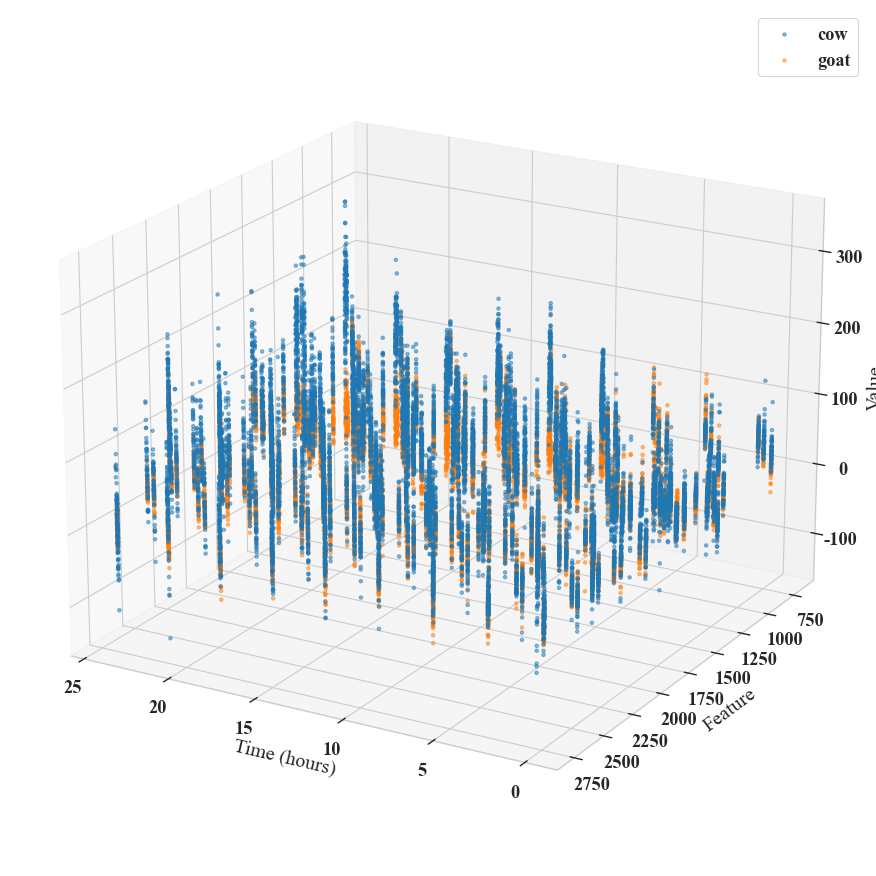

In [23]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

selected_features = [
    1241.6630, 1920.4840, 1156.8110, 1648.5700, 1525.1480, 774.9745,
    2333.1760, 1311.0880, 1295.6610, 1303.3740, 2323.5330, 2281.1070,
    2329.3190, 2740.0820, 1417.1540, 697.8358, 1519.3630, 2146.1150,
    2736.2250, 1866.4870, 2331.2470, 2458.5260, 2086.3320, 1588.7870,
    1251.3060, 2506.7380, 1206.9510, 1667.8550, 830.9000, 1596.5010
]
selected_features = [float(x) for x in selected_features]

def colname_to_float(colname):
    try:
        return float(str(colname).strip())
    except:
        return np.nan 

def read_and_melt(path, selected_features):
    df = pd.read_csv(path, header=0)
    time_col = df.columns[0]
    feature_cols = list(df.columns[1:])
    feature_vals = np.array([colname_to_float(c) for c in feature_cols], dtype=float)
    mapping = {fv: col for fv, col in zip(feature_vals, feature_cols) if not np.isnan(fv)}
    matched_cols = []
    for f in selected_features:
        if f in mapping:
            matched_cols.append(mapping[f])
        else:
            idx = int(np.nanargmin(np.abs(feature_vals - f)))
            matched_cols.append(feature_cols[idx])
    df_sel = df[[time_col] + matched_cols].copy()
    df_long = df_sel.melt(id_vars=[time_col], var_name='feature_col', value_name='value')
    df_long['Feature'] = df_long['feature_col'].map(colname_to_float)
    df_long['time_label'] = pd.to_numeric(df_long[time_col], errors='coerce').astype(int)
    df_long['time_hr'] = df_long['time_label'] * 3
    return df_long

dfA = read_and_melt(file_A, selected_features)
dfA['type'] = 'cow'
dfB = read_and_melt(file_B, selected_features)
dfB['type'] = 'goat'

df_all = pd.concat([dfA, dfB], ignore_index=True)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = {'cow': 'tab:blue', 'goat': 'tab:orange'}
for t in df_all['type'].unique():
    g = df_all[df_all['type'] == t]
    ax.scatter(g['time_hr'], g['Feature'], g['value'],
               s=6, alpha=0.5, label=t, depthshade=True, c=colors.get(t, None))

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Feature')
ax.set_zlabel('Value')
ax.legend()
ax.view_init(elev=20, azim=120)
plt.tight_layout()
plt.show()


### 均值散点图

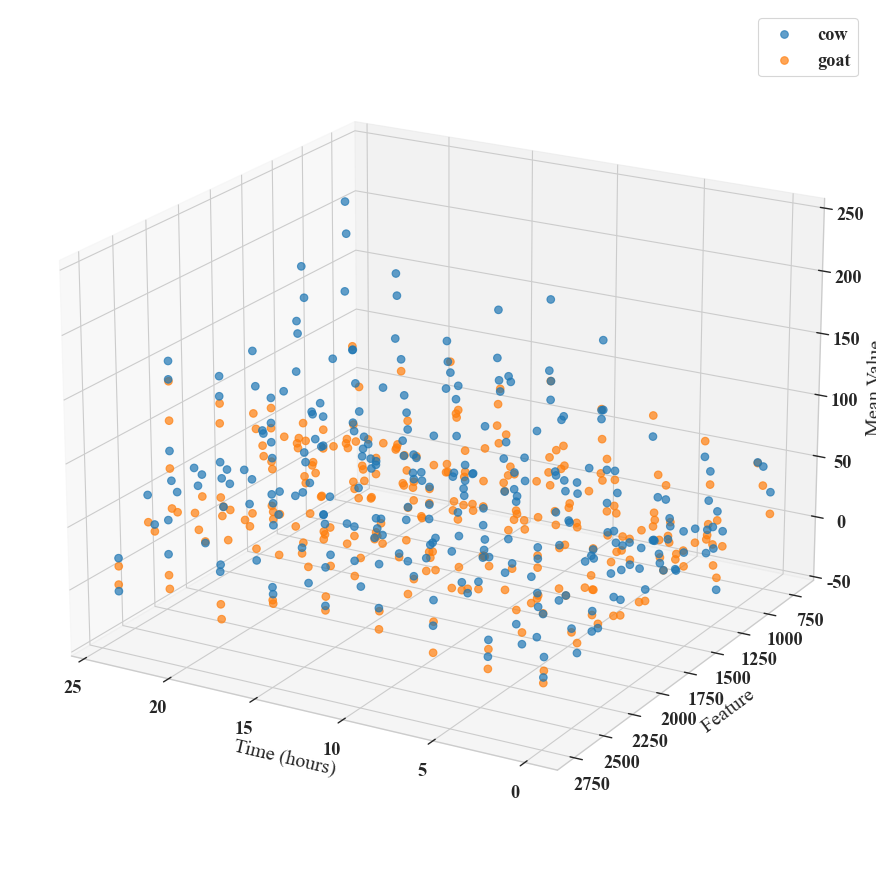

In [24]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

selected_features = [
    1241.6630, 1920.4840, 1156.8110, 1648.5700, 1525.1480, 774.9745,
    2333.1760, 1311.0880, 1295.6610, 1303.3740, 2323.5330, 2281.1070,
    2329.3190, 2740.0820, 1417.1540, 697.8358, 1519.3630, 2146.1150,
    2736.2250, 1866.4870, 2331.2470, 2458.5260, 2086.3320, 1588.7870,
    1251.3060, 2506.7380, 1206.9510, 1667.8550, 830.9000, 1596.5010
]
selected_features = [float(x) for x in selected_features]

def colname_to_float(colname):
    try:
        return float(str(colname).strip())
    except:
        return np.nan

def read_and_melt(path, selected_features):
    df = pd.read_csv(path, header=0)
    time_col = df.columns[0]
    feature_cols = list(df.columns[1:])
    feature_vals = np.array([colname_to_float(c) for c in feature_cols], dtype=float)
    mapping = {fv: col for fv, col in zip(feature_vals, feature_cols) if not np.isnan(fv)}
    matched_cols = []
    for f in selected_features:
        if f in mapping:
            matched_cols.append(mapping[f])
        else:
            idx = int(np.nanargmin(np.abs(feature_vals - f)))
            matched_cols.append(feature_cols[idx])
    df_sel = df[[time_col] + matched_cols].copy()
    df_long = df_sel.melt(id_vars=[time_col], var_name='feature_col', value_name='value')
    df_long['Feature'] = df_long['feature_col'].map(colname_to_float)
    df_long['time_label'] = pd.to_numeric(df_long[time_col], errors='coerce').astype(int)
    df_long['time_hr'] = df_long['time_label'] * 3
    return df_long

dfA = read_and_melt(file_A, selected_features)
dfA['type'] = 'cow'
dfB = read_and_melt(file_B, selected_features)
dfB['type'] = 'goat'

df_all = pd.concat([dfA, dfB], ignore_index=True)

# 计算均值
mean_df = df_all.groupby(['type', 'time_hr', 'Feature'])['value'].mean().reset_index()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = {'cow': 'tab:blue', 'goat': 'tab:orange'}

for milk_type in mean_df['type'].unique():
    subset = mean_df[mean_df['type'] == milk_type]
    ax.scatter(subset['time_hr'], subset['Feature'], subset['value'],
               s=30, alpha=0.7, label=milk_type, color=colors[milk_type])

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Feature ')
ax.set_zlabel('Mean Value')
ax.legend()
ax.view_init(elev=20, azim=120)
plt.tight_layout()
plt.show()


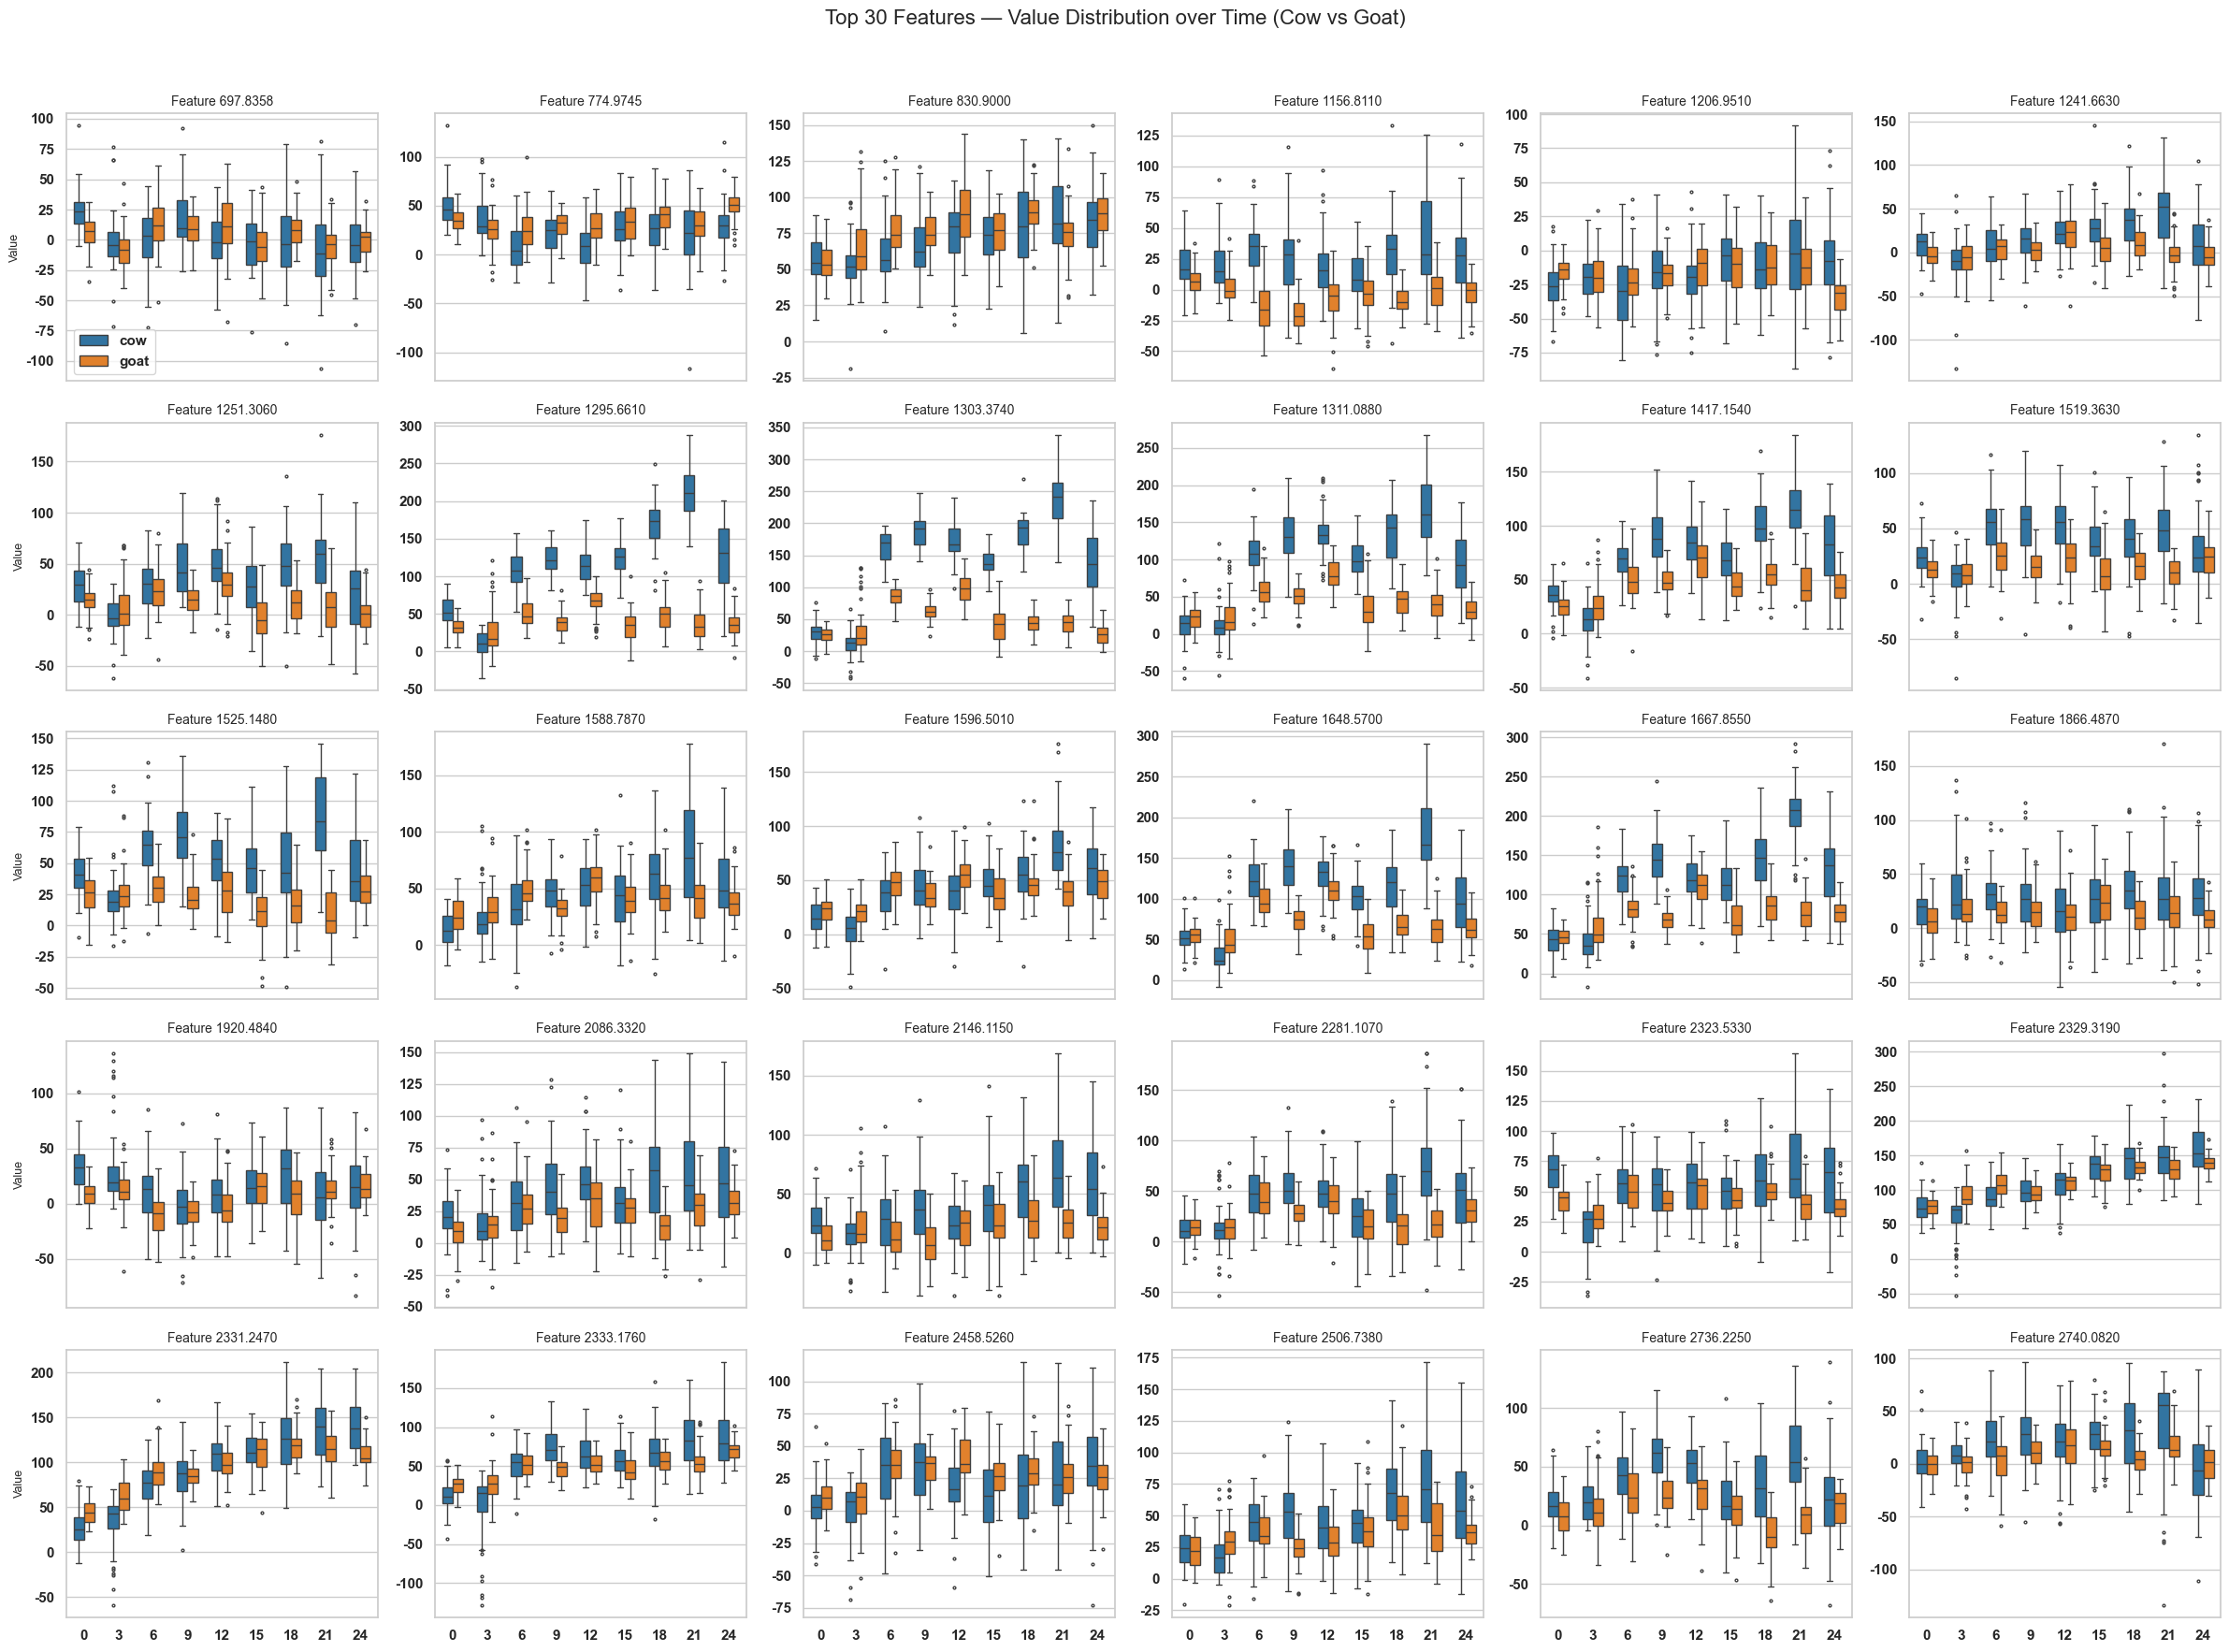

In [29]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = [
    1241.6630, 1920.4840, 1156.8110, 1648.5700, 1525.1480, 774.9745,
    2333.1760, 1311.0880, 1295.6610, 1303.3740, 2323.5330, 2281.1070,
    2329.3190, 2740.0820, 1417.1540, 697.8358, 1519.3630, 2146.1150,
    2736.2250, 1866.4870, 2331.2470, 2458.5260, 2086.3320, 1588.7870,
    1251.3060, 2506.7380, 1206.9510, 1667.8550, 830.9000, 1596.5010
]
selected_features = [float(x) for x in selected_features]

def colname_to_float(colname):
    try:
        return float(str(colname).strip())
    except:
        return np.nan 

def read_and_melt(path, selected_features):
    df = pd.read_csv(path, header=0)
    time_col = df.columns[0]
    feature_cols = list(df.columns[1:])
    feature_vals = np.array([colname_to_float(c) for c in feature_cols], dtype=float)
    mapping = {fv: col for fv, col in zip(feature_vals, feature_cols) if not np.isnan(fv)}
    matched_cols = []
    for f in selected_features:
        if f in mapping:
            matched_cols.append(mapping[f])
        else:
            idx = int(np.nanargmin(np.abs(feature_vals - f)))
            matched_cols.append(feature_cols[idx])
    df_sel = df[[time_col] + matched_cols].copy()
    df_long = df_sel.melt(id_vars=[time_col], var_name='feature_col', value_name='value')
    df_long['Feature'] = df_long['feature_col'].map(colname_to_float)
    df_long['time_label'] = pd.to_numeric(df_long[time_col], errors='coerce').astype(int)
    df_long['time_hr'] = df_long['time_label'] * 3
    return df_long

file_A = id_to_fullpath('yogurt_fermentation_a')
file_B = id_to_fullpath('yogurt_fermentation_b')

# 读取两种牛奶的数据
dfA = read_and_melt(file_A, selected_features)
dfA['type'] = 'cow'
dfB = read_and_melt(file_B, selected_features)
dfB['type'] = 'goat'

# 合并
df_all = pd.concat([dfA, dfB], ignore_index=True)

# ------------------- 箱型图部分 -------------------
sns.set(style="whitegrid")
features = sorted(df_all['Feature'].unique())

fig, axes = plt.subplots(5, 6, figsize=(24, 18), sharex=True)
axes = axes.flatten()

palette = {'cow': 'tab:blue', 'goat': 'tab:orange'}

for i, feat in enumerate(features):
    ax = axes[i]
    sub_df = df_all[df_all['Feature'] == feat]
    sns.boxplot(
        data=sub_df,
        x='time_hr', y='value',
        hue='type',
        palette=palette,
        ax=ax,
        width=0.6,
        fliersize=2
    )
    ax.set_title(f'Feature {feat:.4f}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Value', fontsize=9)
    
    if i % 6 != 0:
        ax.set_ylabel('')
    if i == 0:
        ax.legend()
    else:
        ax.get_legend().remove()

plt.suptitle('Top 30 Features — Value Distribution over Time (Cow vs Goat)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 固定纵坐标比较

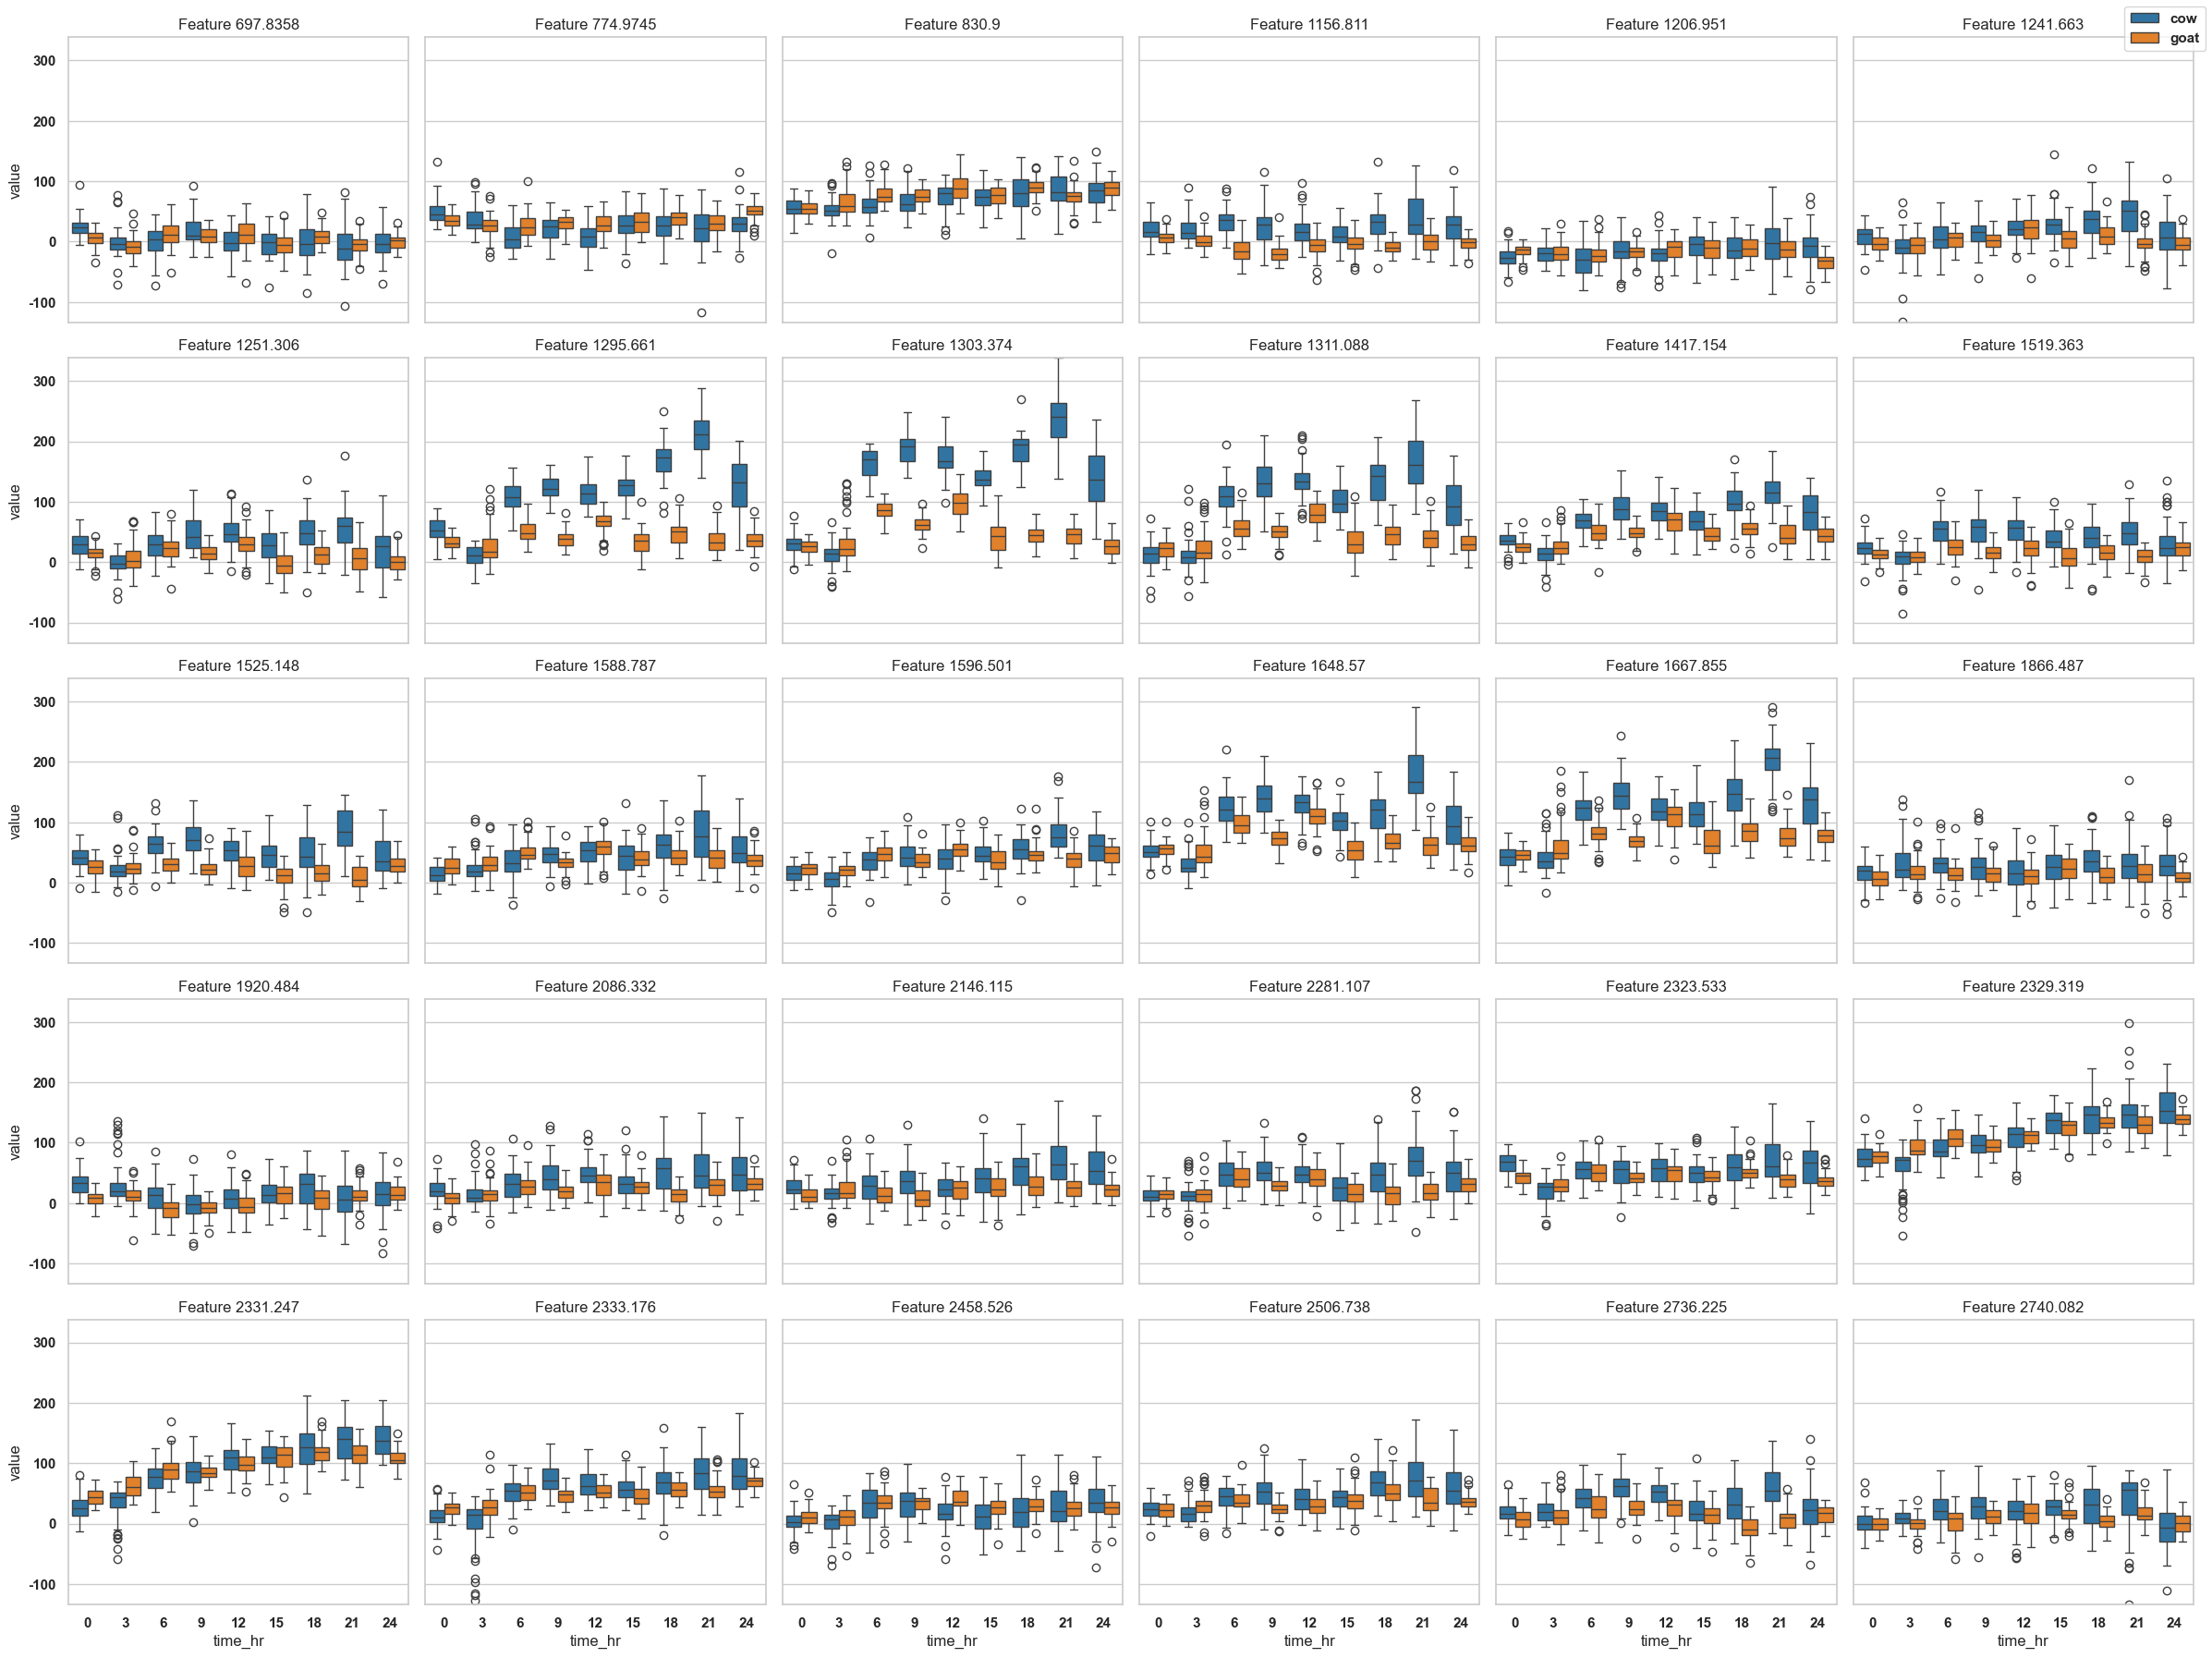

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算统一的纵轴范围
y_min = df_all['value'].min()
y_max = df_all['value'].max()

# 获取唯一特征
features = sorted(df_all['Feature'].unique())

# 创建画布
fig, axes = plt.subplots(5, 6, figsize=(24, 18), sharex=True, sharey=True)  # sharey=True 更方便
axes = axes.flatten()

# 绘制每个特征的箱型图
for i, feature in enumerate(features):
    ax = axes[i]
    subset = df_all[df_all['Feature'] == feature]
    sns.boxplot(
        data=subset,
        x='time_hr',
        y='value',
        hue='type',
        palette={'cow': 'tab:blue', 'goat': 'tab:orange'},
        ax=ax
    )
    ax.set_title(f"Feature {feature}")
    ax.set_ylim(y_min, y_max)  # 统一纵轴
    ax.legend_.remove()  # 去掉子图的重复图例

# 主图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()